<h1><center><font size="8">Iris EDA</font></center></h1>
<h1><center><font size="5">Author: Zach Chase</font></center></h1>

# Introduction

The Iris flower data set was compiled by British statistician Ronald Fisher in 1936.
Since its first introduction, this data set has become one of the most popular in data mining,
classification, and clustering. (Note the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/iris). The purpose of this project is three fold:

- Conduct Exploratory Data Analysis on the data
- Explore PCA with the data
- Utilize several clustering algorithms along with PCA

# Libraries

This analysis first begins by importing key libraries, with the accompanying source with each library.

In [1]:
%%capture
from sklearn.datasets import load_iris 
from pandas_profiling import ProfileReport 
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import plotly.express as px 
from plotly.graph_objects import Layout
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

The libraries above can be broken down into 3 main categories: visualization, data analysis, and automated in-depth tools. The main libraries for visualization are matplotlib, seaborn, and plotly. The main data analysis libraries are sklearn, numpy, and pandas. The main libraries for the automated, in-depth analysis are pandas_profiling, autoviz, and sweetviz.

# Inputs

To begin with the exploratory data analysis of the iris data set, the data must first be loaded and imported into a Pandas DataFrame. From the sklearn library, the data will be loaded into a Pandas DataFrame and ensure that each column has the appropriate label associated with it. Several sample rows will be displayed.

In [2]:
iris_loaded = load_iris()
irisDF = pd.DataFrame(data=iris_loaded.data, columns=iris_loaded.feature_names)
irisDF['species'] = iris_loaded.target
irisDF['species_name'] = pd.Categorical.from_codes(iris_loaded.target, iris_loaded.target_names)
irisDF.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
40                 5.0               3.5                1.3               0.3   
24                 4.8               3.4                1.9               0.2   
97                 6.2               2.9                4.3               1.3   
2                  4.7               3.2                1.3               0.2   
127                6.1               3.0                4.9               1.8   

     species species_name  
40         0       setosa  
24         0       setosa  
97         1   versicolor  
2          0       setosa  
127        2    virginica

# EDA

Note from the sample of the DataFrame above that it appears we have 4 factors corresponding to each recored entry of a flower. These 4 factors are sepal length (in cemtimeters), sepal width (in centimeters), petal length (in centimeters), and petal width (in centimeters). To start the EDA, it might be interesting to try a couple on tools available to assist in EDA: Sweetviz, Pandas Profiling, and Autoviz.

## Sweetviz
Using the library sweetviz, the first in-depth exploration will be conducted.

                                             |      | [  0%]   00:00 -> (? left)


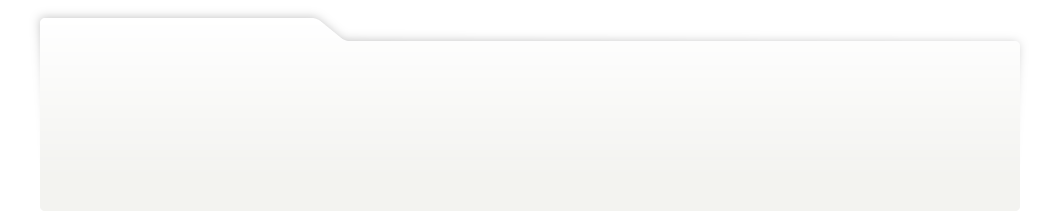
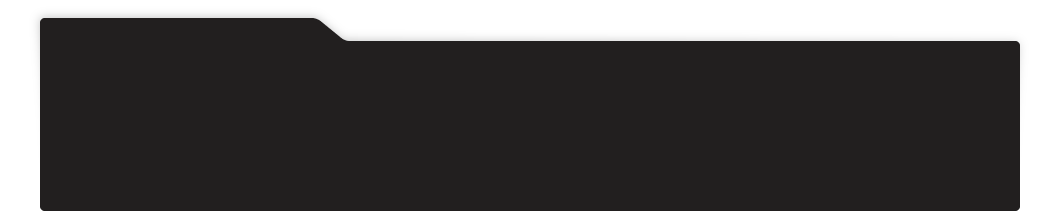
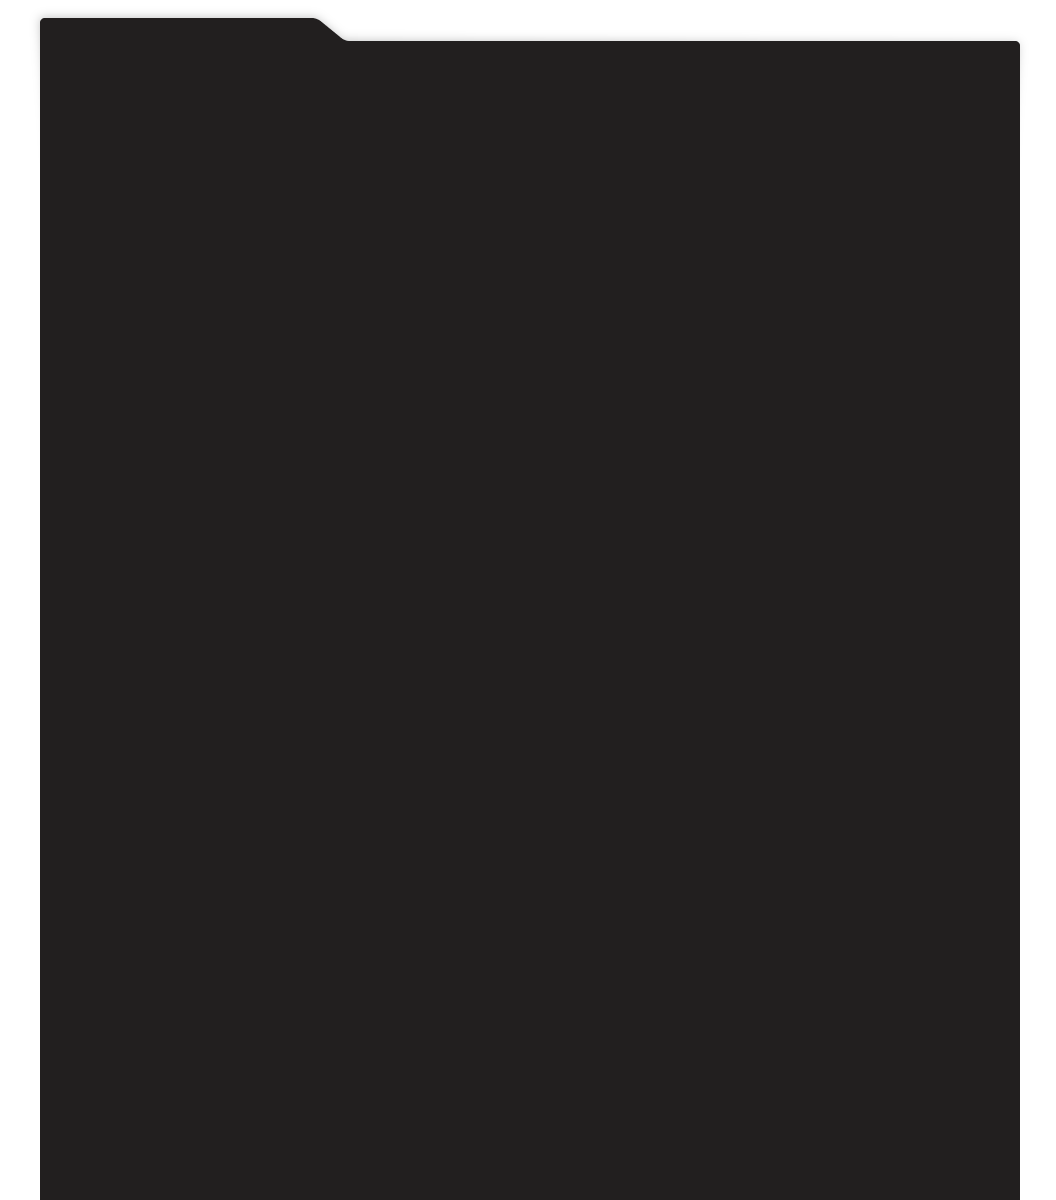
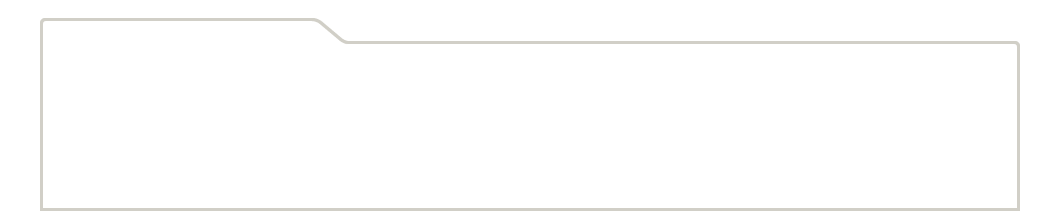
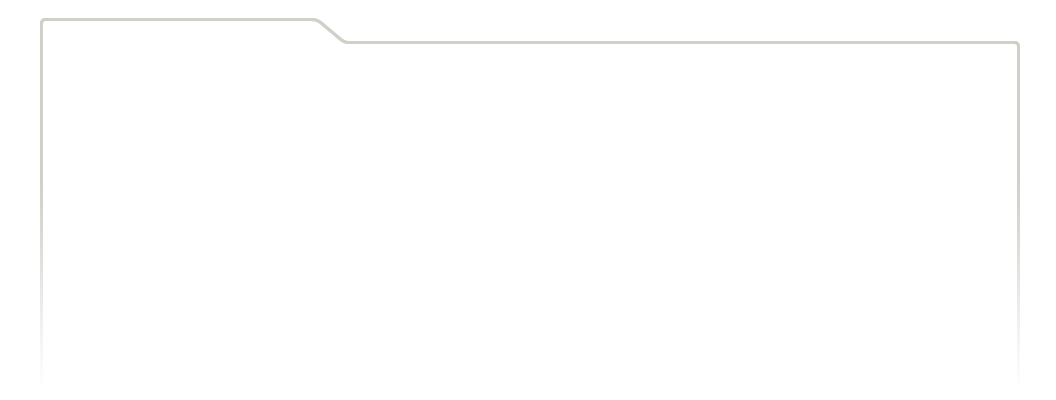
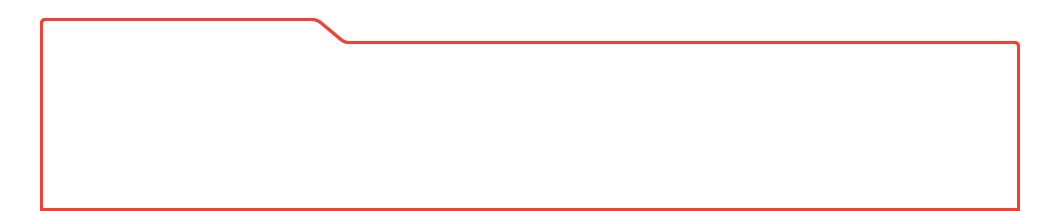
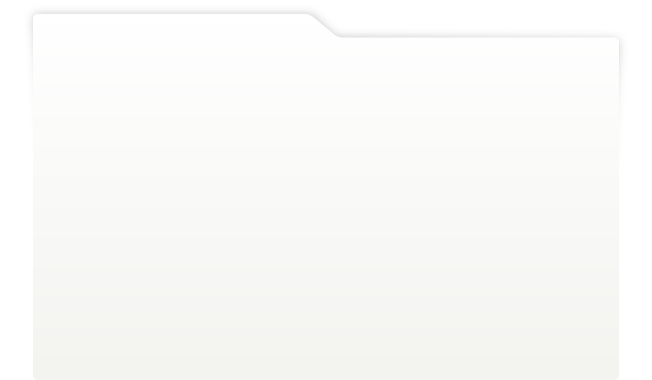
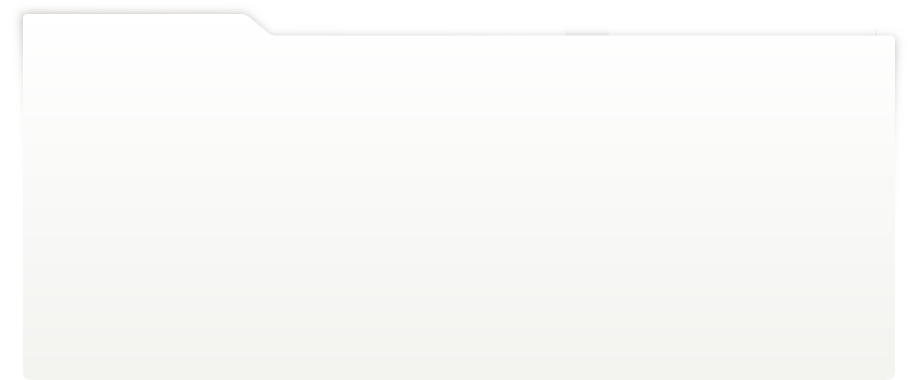
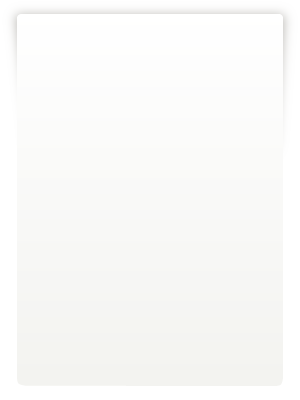
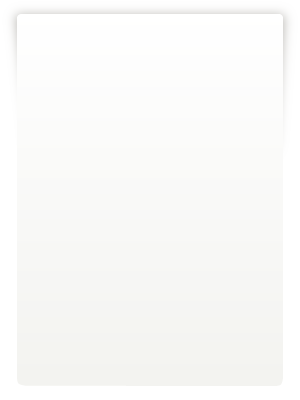
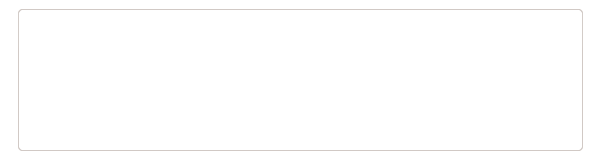
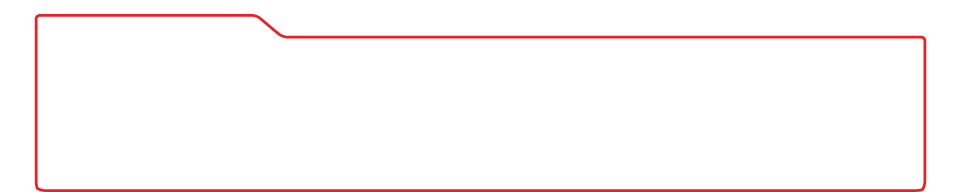
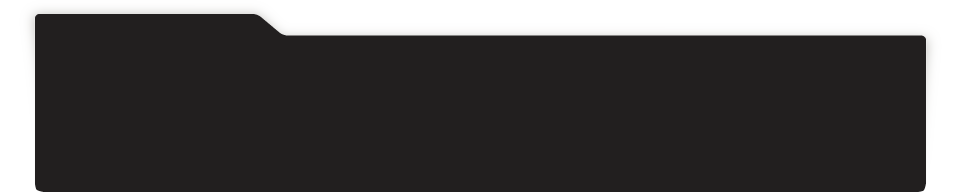
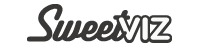
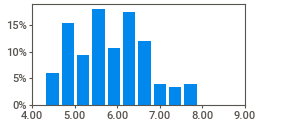
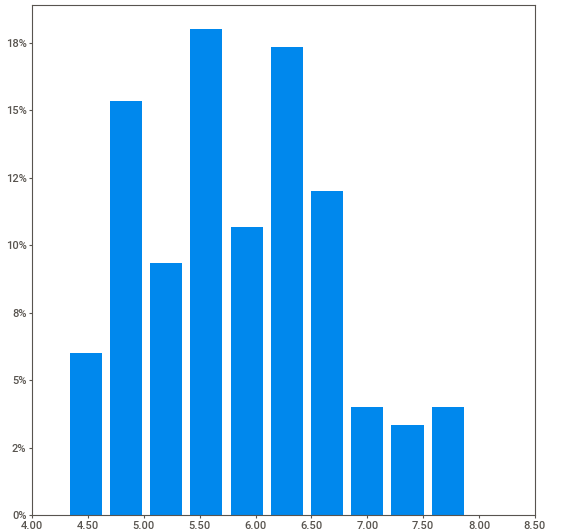
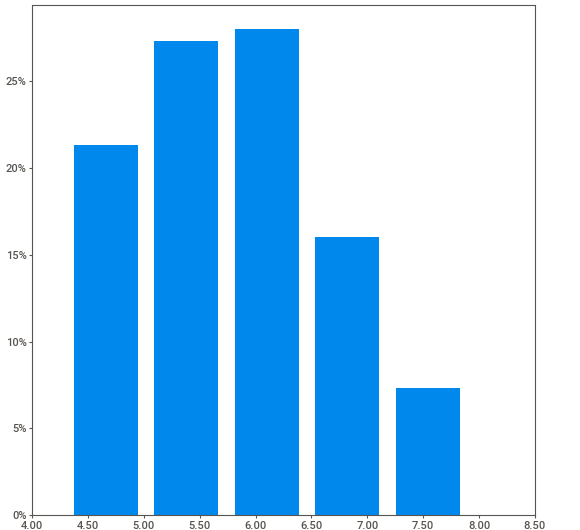
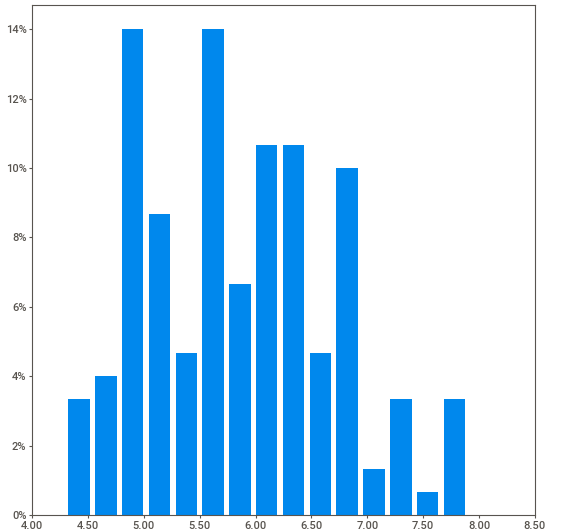
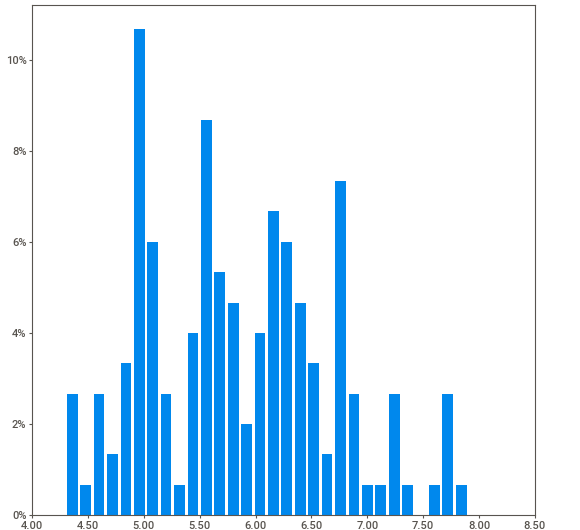
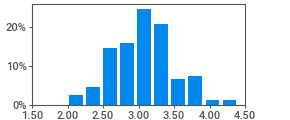
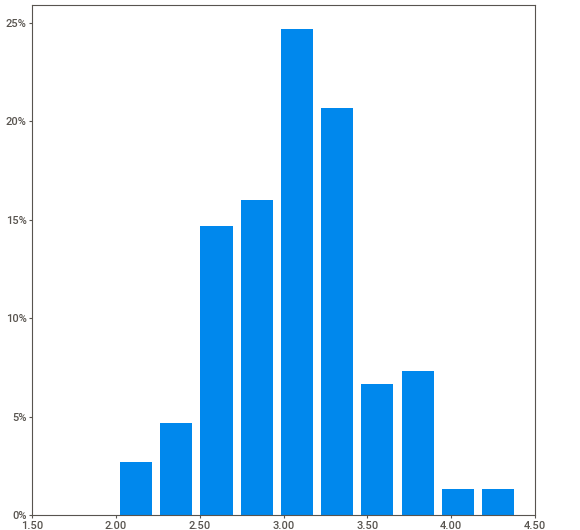
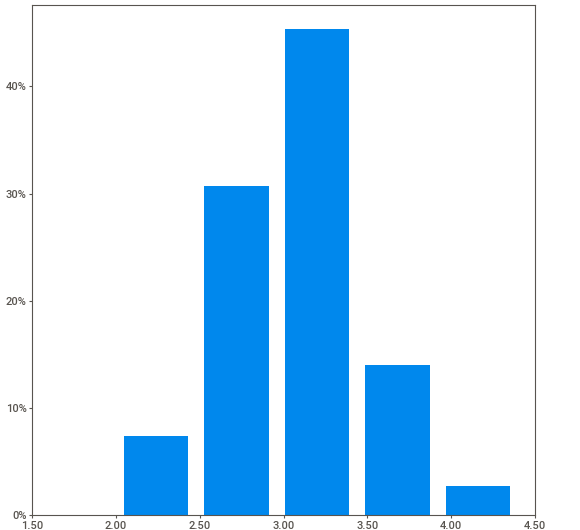
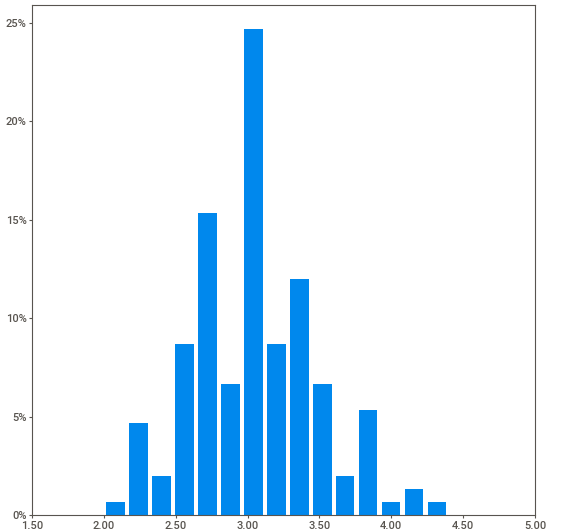
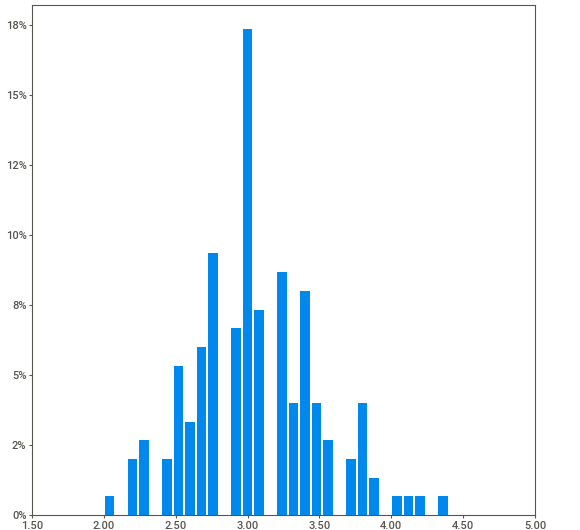
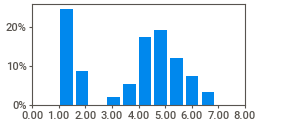
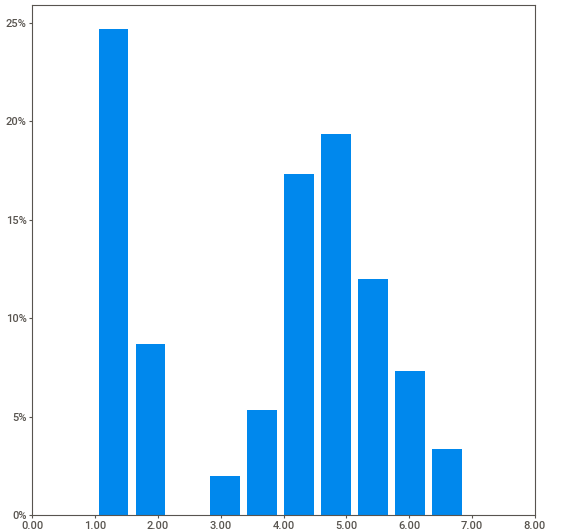
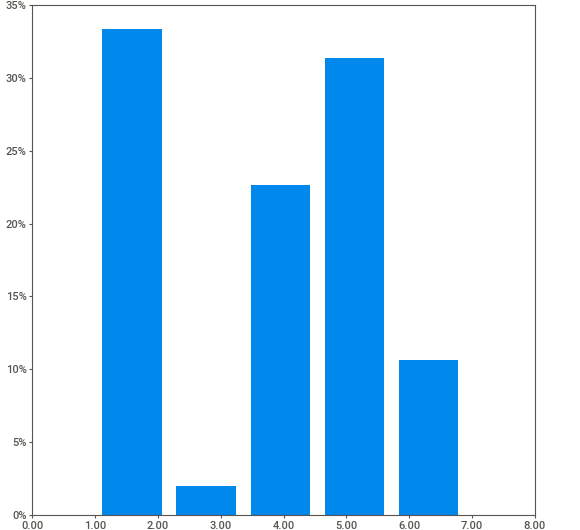
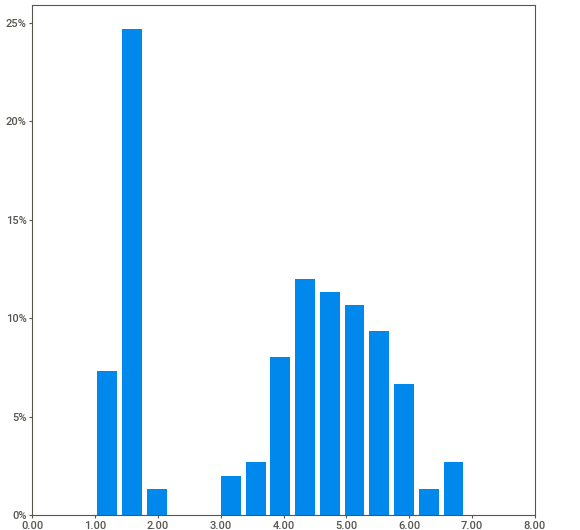
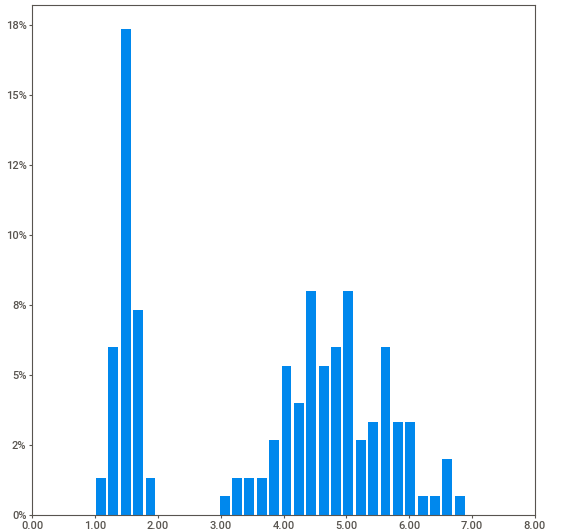
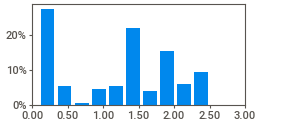
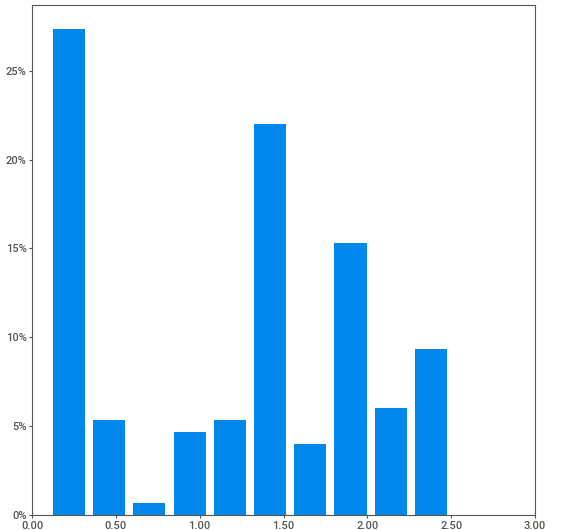
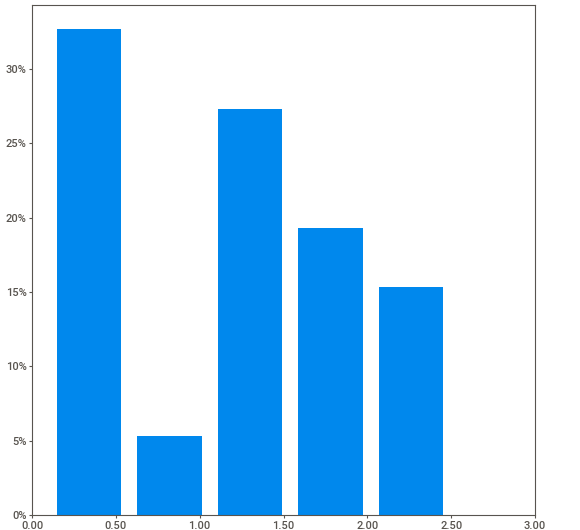
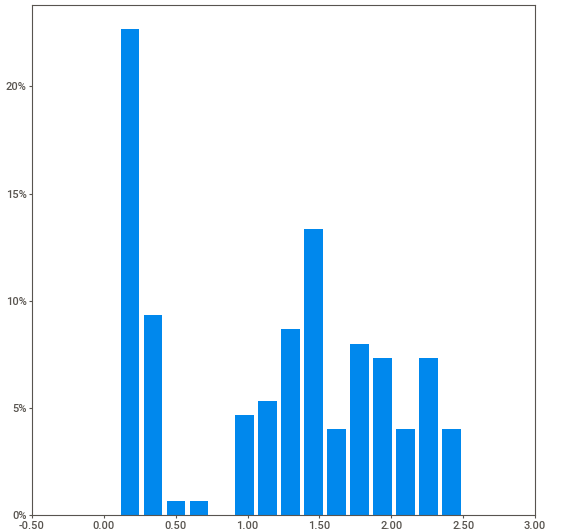
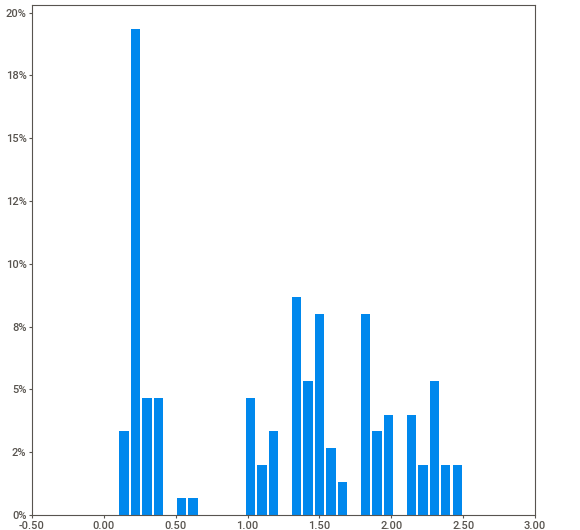
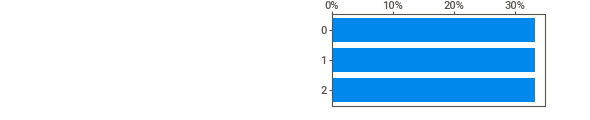
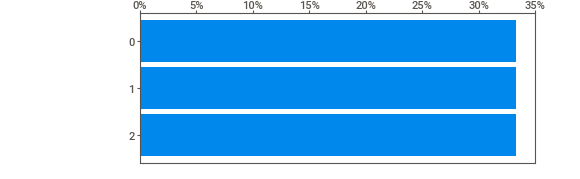
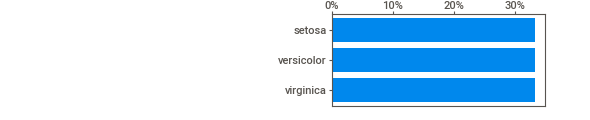
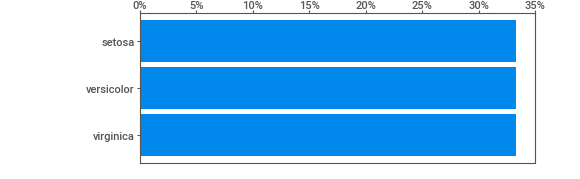
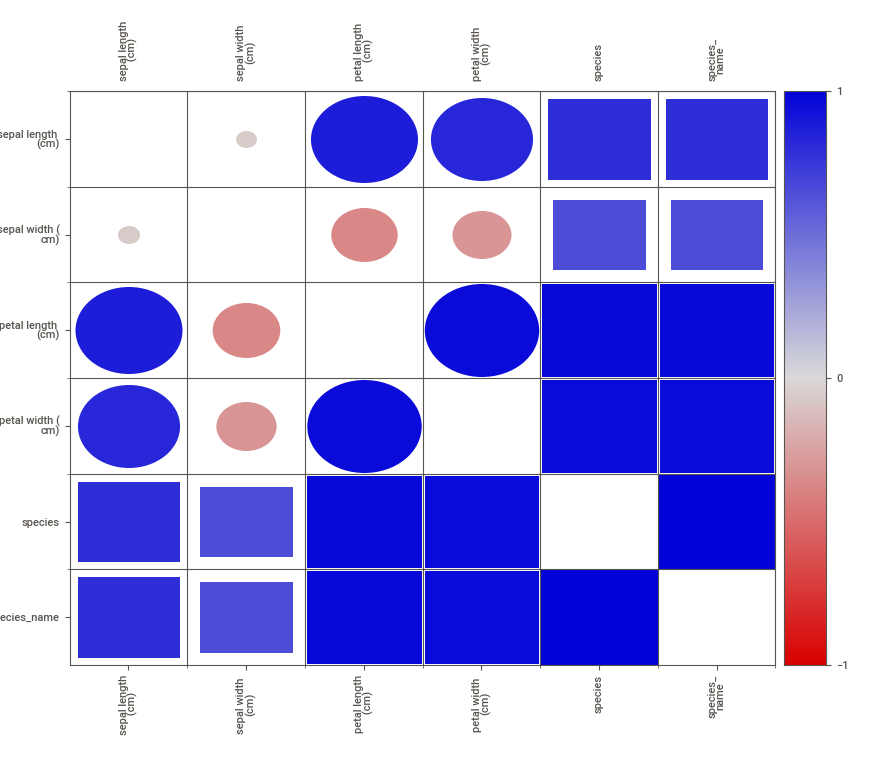
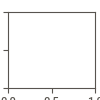

In [3]:
sweet_report = sv.analyze(irisDF)
sweet_report.show_notebook()

First, note from the sweetviz report that there are 150 recorded entries of the iris dataset. Of those 150 entries, there are no missing entries, and only 1 duplicate entry. At this point it is unclear if it is truly the same entry duplicated, or rather just the same measurements on separate recorded iris flowers. Due to this uncertainty it will be best to keep the entry in the dataset. Additionally, note from the histograms from the report that there is a distinct cluster of entries for both the petal length and petal width factors. Further analysis will be needed to better understand this anomaly. Additionally, note that this sweetviz report did nothing regarding the label of iris species within the dataset.

## Pandas Profiling

In [4]:
design_report = ProfileReport(irisDF)
design_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Similarly to sweetviz, pandas profiling creates an in-depth report to better understand the iris flower data set. In addition to the reaffirmed conclusions that the sweetviz report made (number of observations, number of missing entries, and histogram/quantile statistics of each qualitative factor), this report also contributes several more key insights. First, this report shows that the duplicate row contains the following data:

|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|species|
|------|------|------|------|------|
|5.8     |2.7     |5.1     |1.9     |virginica     |

Again, since it can't be determined at the current time if this is truly a duplicate row or just the same measurements on different flower entries, the data will remain the dataset. Next, note that this report briefly addresses the categorial data (unlike the sweetviz report) by showing that there are 50 entries for the iris species setosa, versicolor, and virginica. Additionally, this report displays correlations between each factor in the form of alerts and a heatmap. The alert shows that there is a high correlation in 15 combinations of factors, and the heatmat shows that the strongest correlation occurs between the factors of petal length and petal width. Lastly, the scatterplot between combinations of factors may be usefuly, but it might be best to wait on this graph until species labels are included in the graph.

## Autoviz

Shape of your Data Set loaded: (150, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    6 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 10


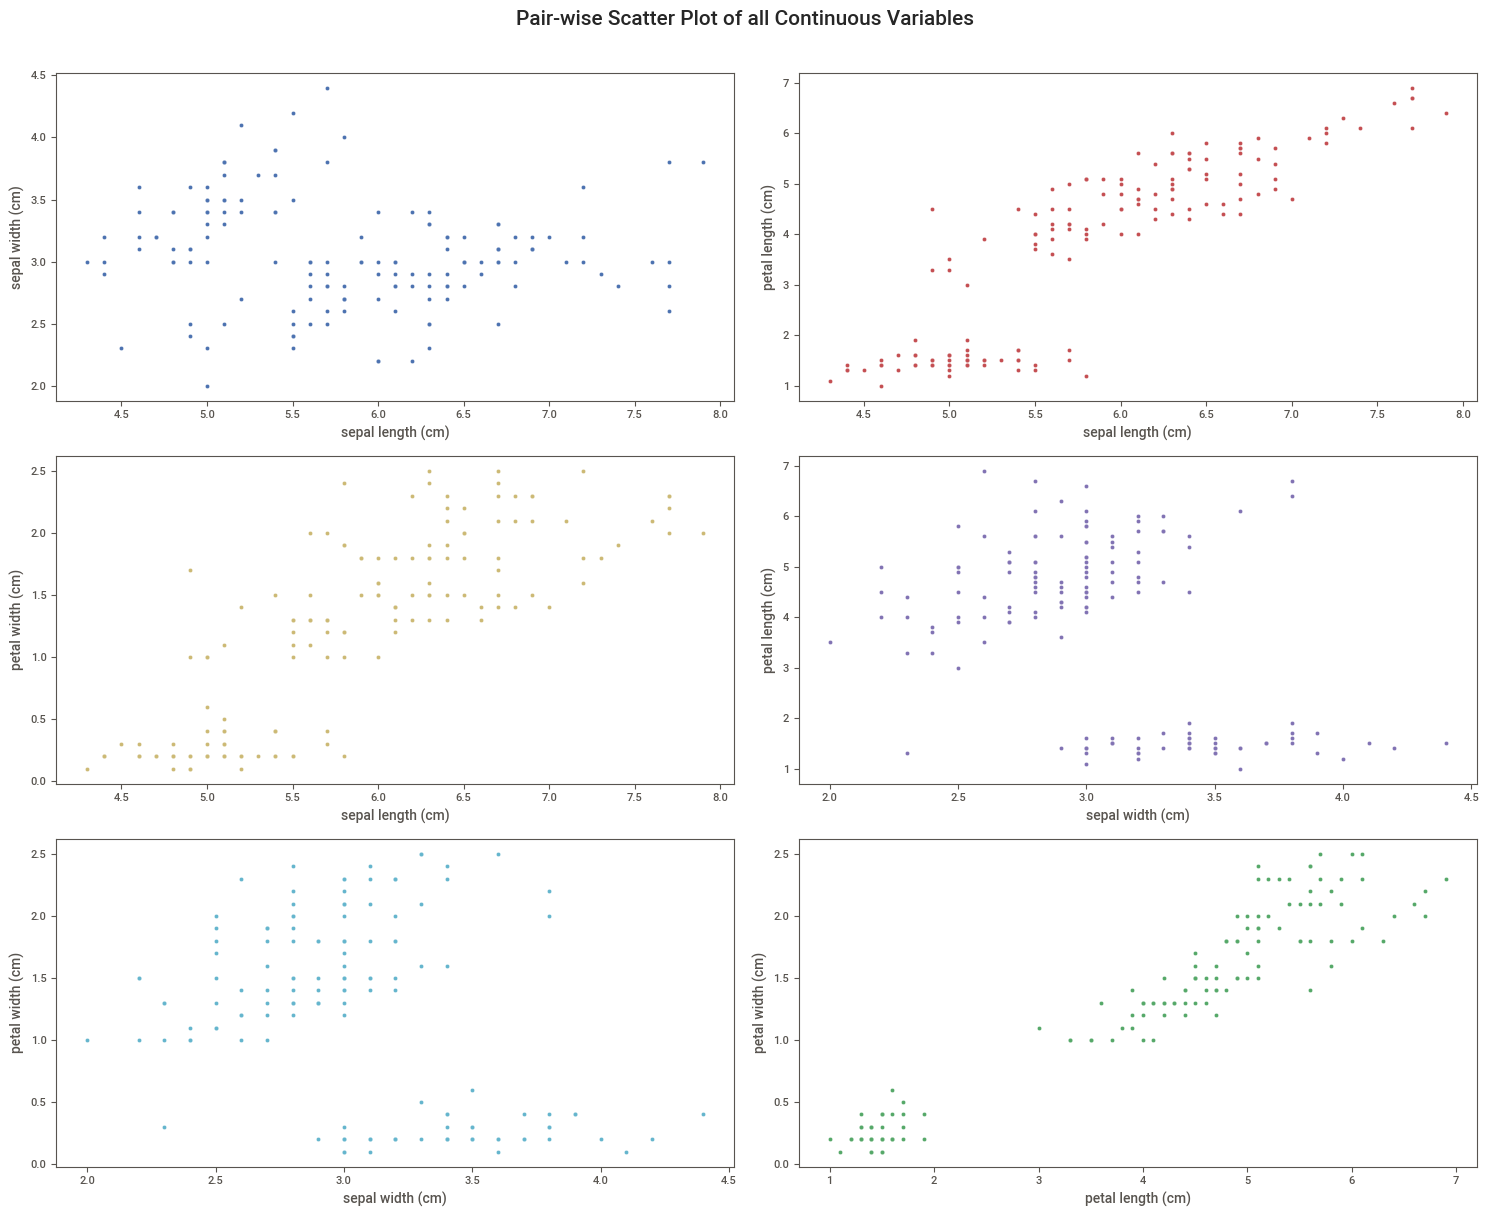

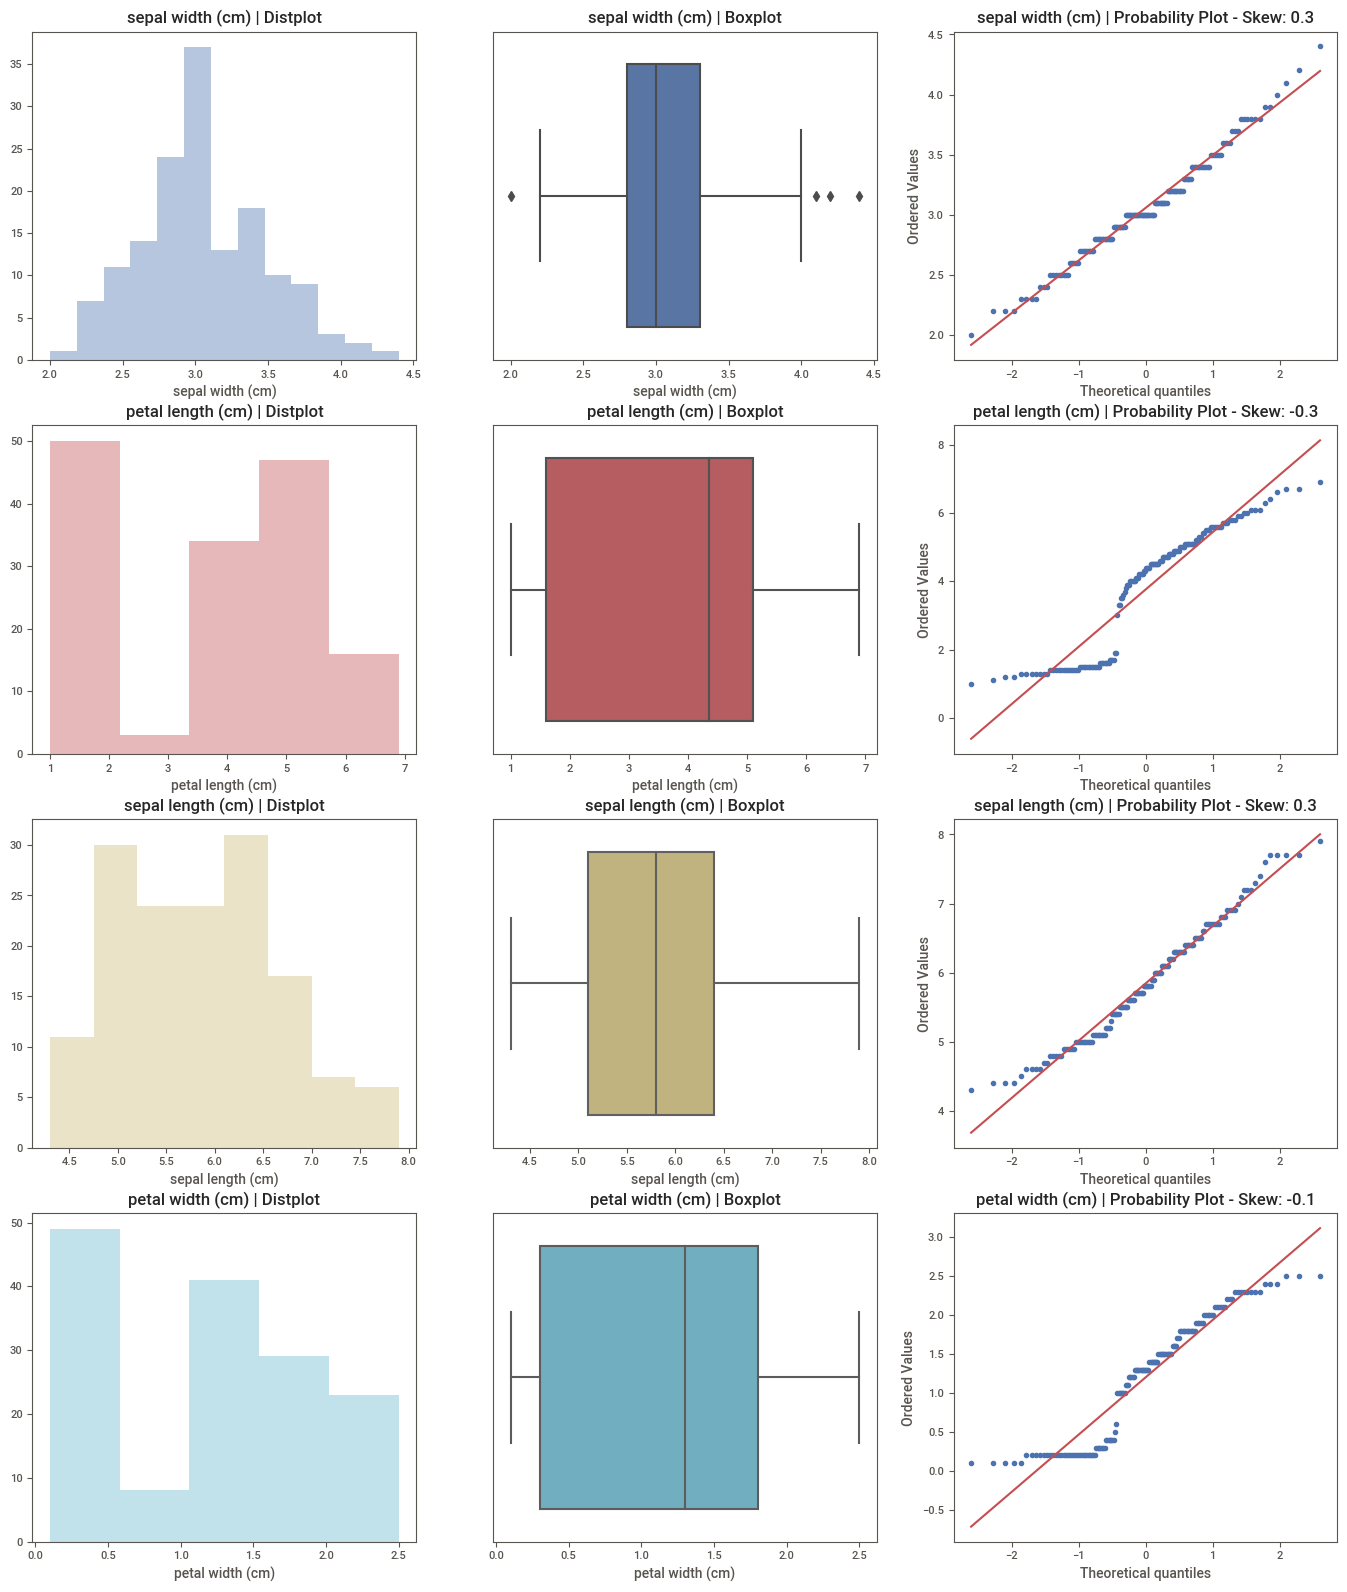

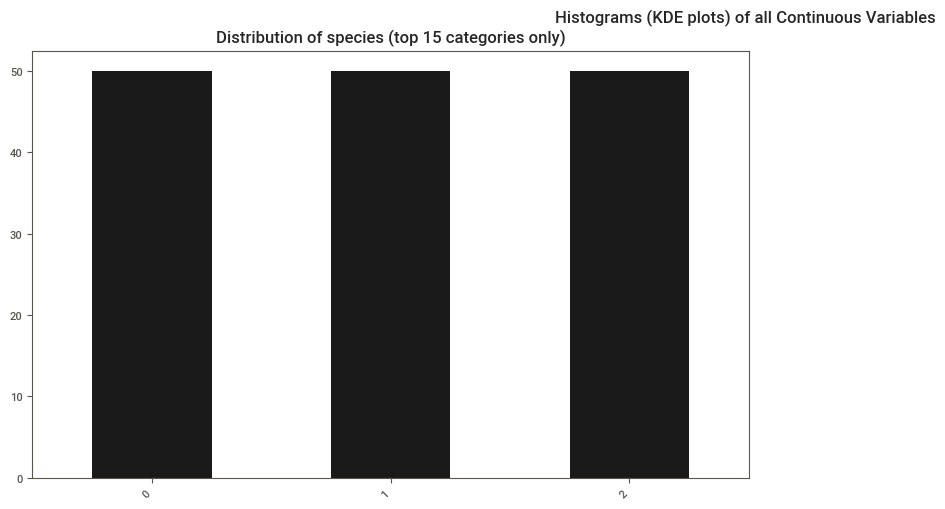

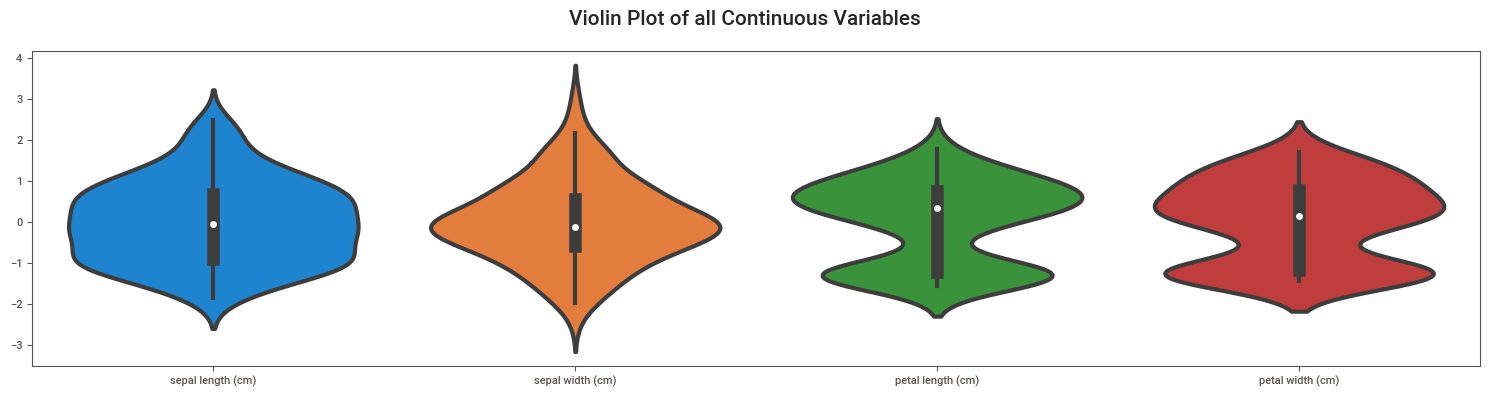

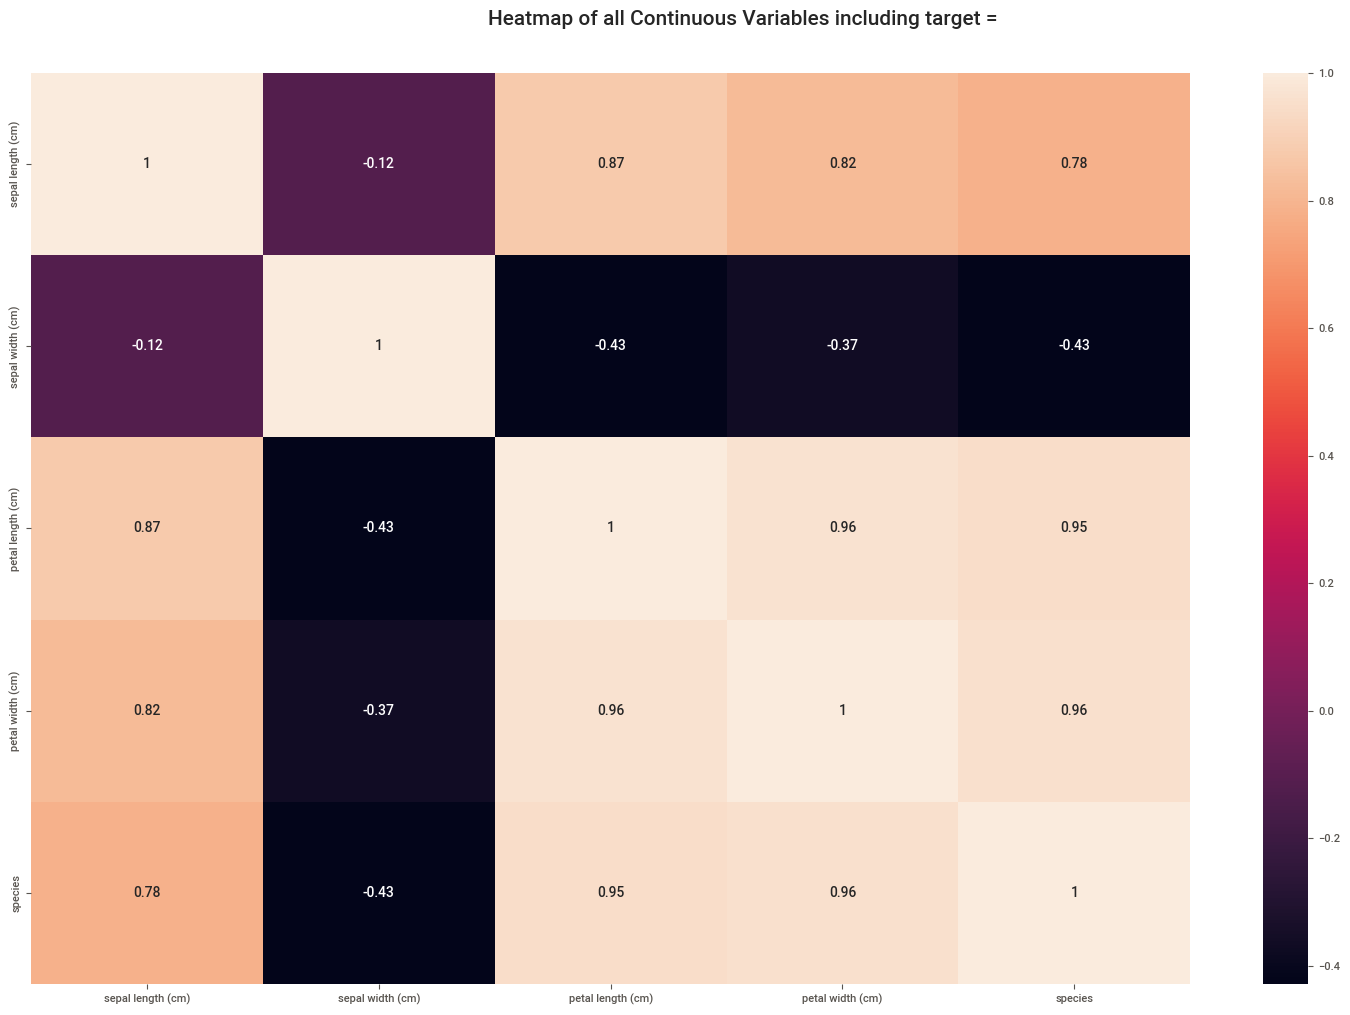

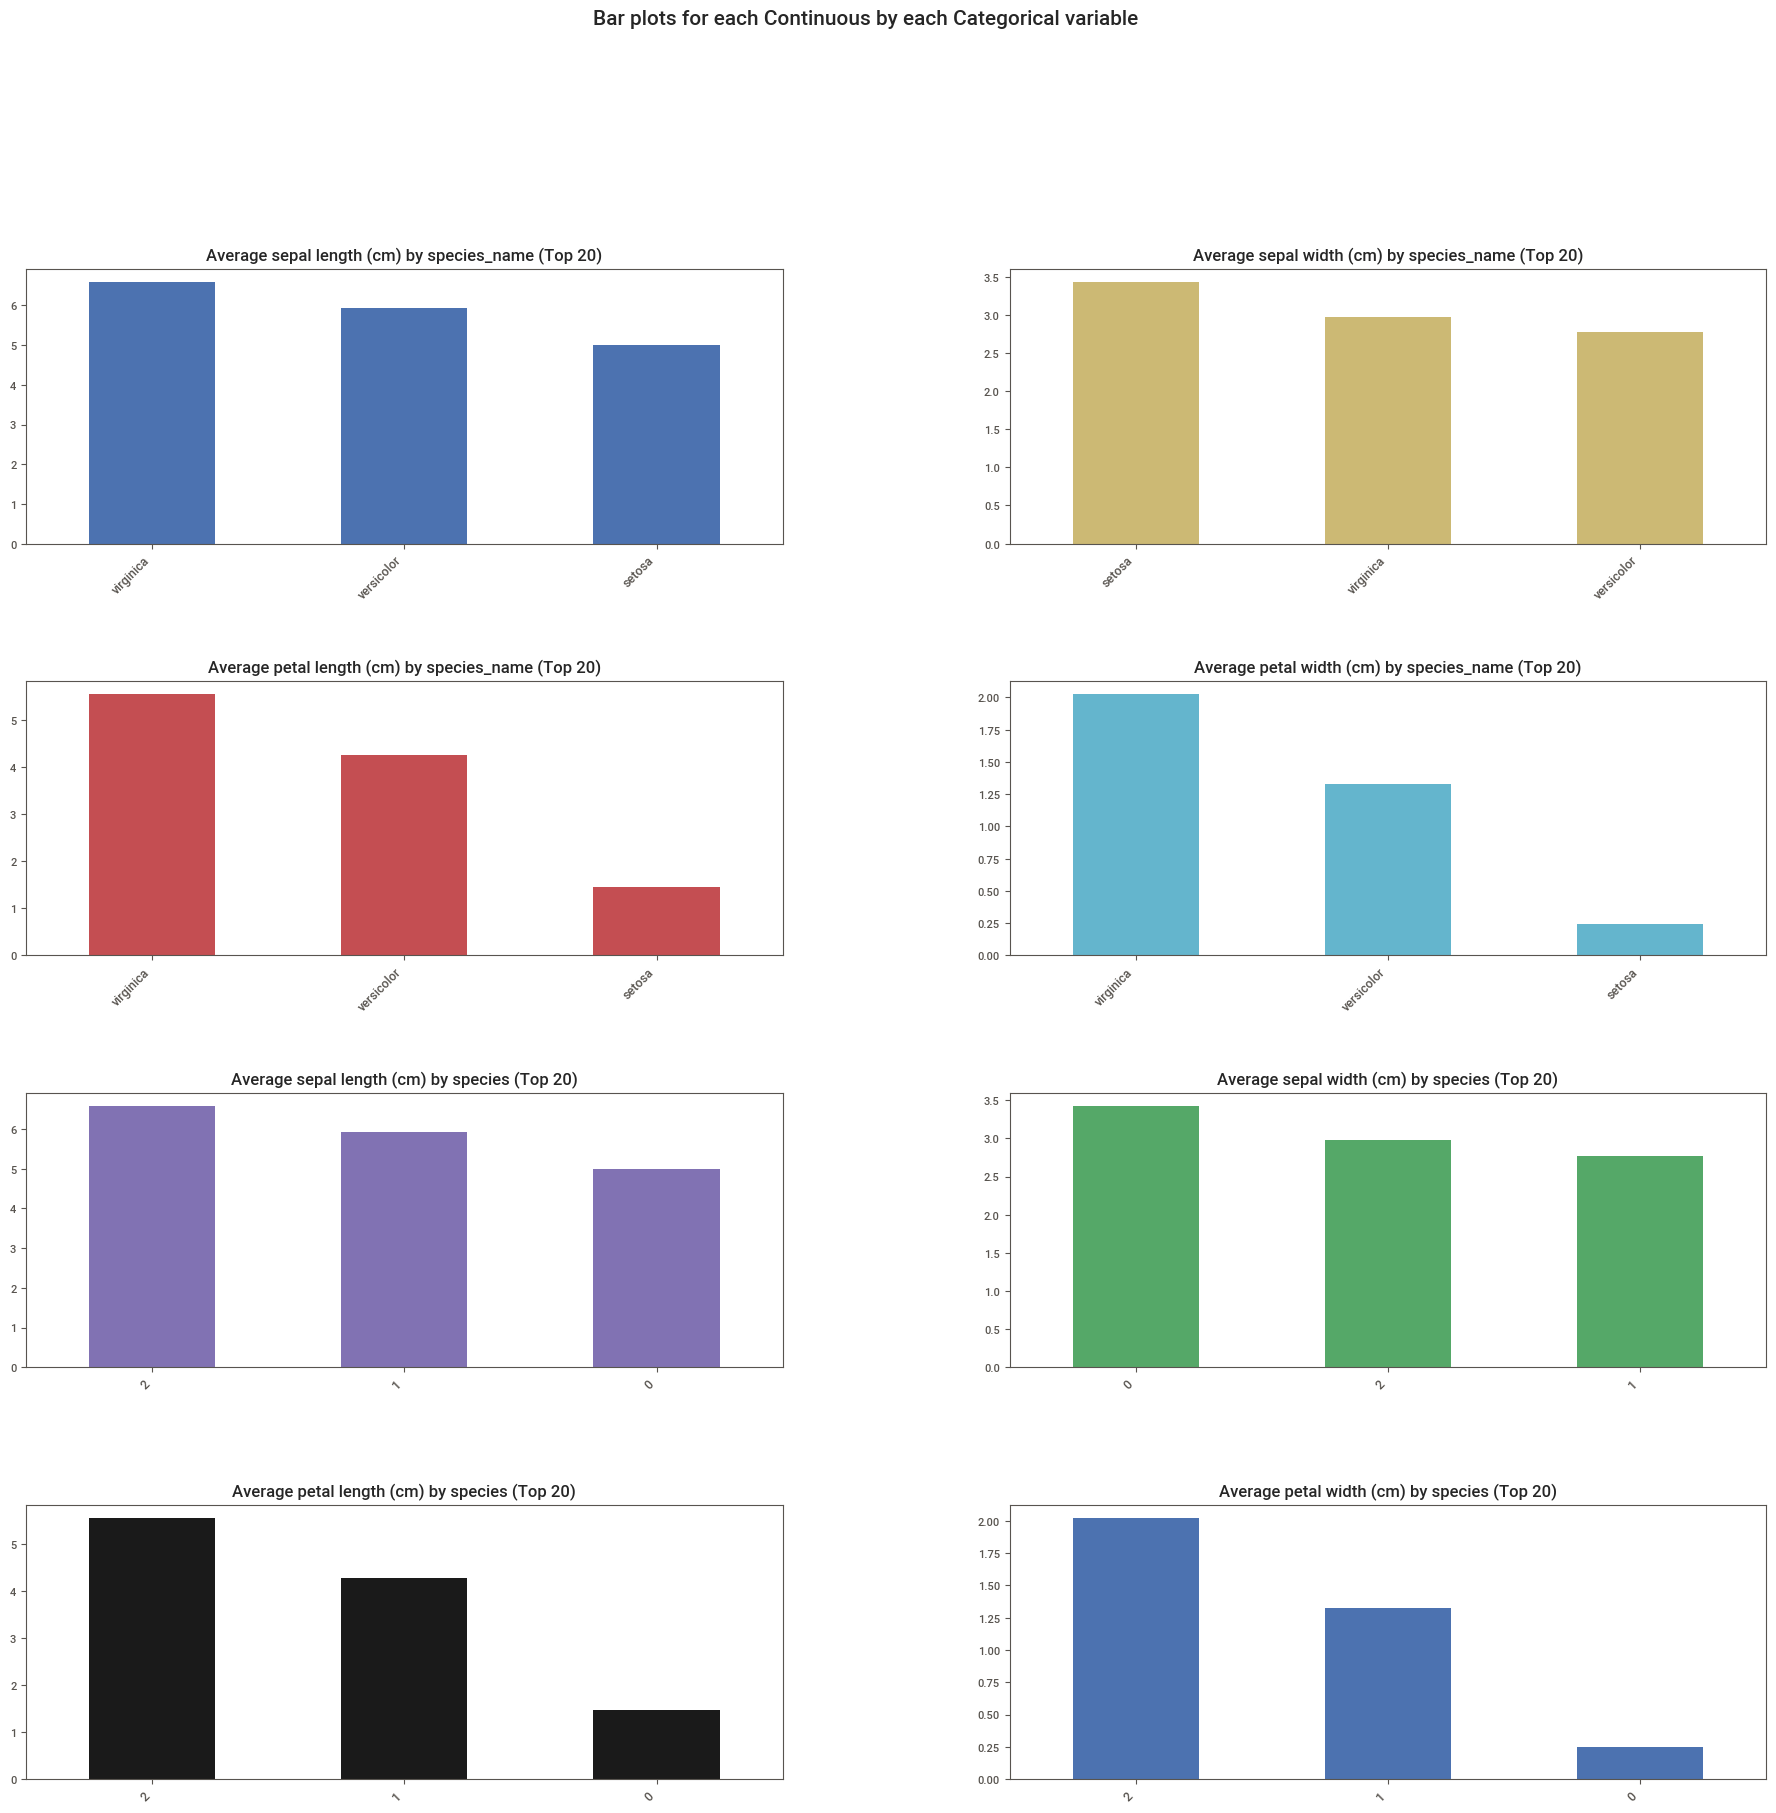

Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [5]:
AV = AutoViz_Class()
 
dft = AV.AutoViz(
    filename="",
    dfte=irisDF,
)

This last in-depth tool to begin the exploratory data anlysis utilizes various visualizations to gain initial insights of the iris dataset. Note that in the scatterplots comparing each combination of quantitative factors that a distinct cluster occurs in the following graphs: sepal length vs petal length, sepal length vs petal width, sepal width vs petal length, sepal width vs petal width, and petal length vs petal width. Additionally, the violin plots showing all of the continuous data shows that the petal length and petal width factors have distinctly separate subsets of data within. Finally, the last section of the autoviz report is most insightful because it is now comparing the factor values by each species label. Initial impressions show that the petal length and the petal width of the setosa iris is significantly lower than that of the virginica and versicolor iris flower. However, the autoviz report only takes 20 entries of each species, so this is not conclusive, but still a good indication that further analysis is needed.

## In-Depth Analysis Tools Conclusion 

The insightful tools of sweetviz, pandas profiling, and autoviz are excellent resources in gaining quick generalizations of the data when first obtained. Several of the main takeaways from these tools include the following: 4 quantitative factors and 1 categorical factor exist for each entry of iris flower. There are 50 entries for the setosa iris, 50 entries for the virginica iris, and 50 entries for the versicolor iris, resulting in 150 total entries. No data is missing, and only 1 duplicate row is present, which will still remain in our dataset. Additionally, distinct clusters exist in the petal length and petal width factors, which will need further analysis.

As for the tools themselves, pandas profiling is by far the best one here. Everything that sweetviz presents in its report is included in the pandas profiling report. Additionally, pandas profliling also includes more visualization, does more analysis on correlation of factors, and has more datails about row duplication and missing values. The next best tool after pandas profiling was autoviz, mostly due to the wide range of visualizations presented, along with the inclusion of analysis of categorical factors, not just quantitative ones. In short, the pandas profiling and autoviz tools seem sufficient to begin the exploratory data analysis of the iris dataset.

# Other Visualizations

From the built insights gained from the already used tools, the next step is to look at visualizations while grouping the entries together based on species. The first plot will be a box plot and violin plot.

## Box Plot and Violin Plot

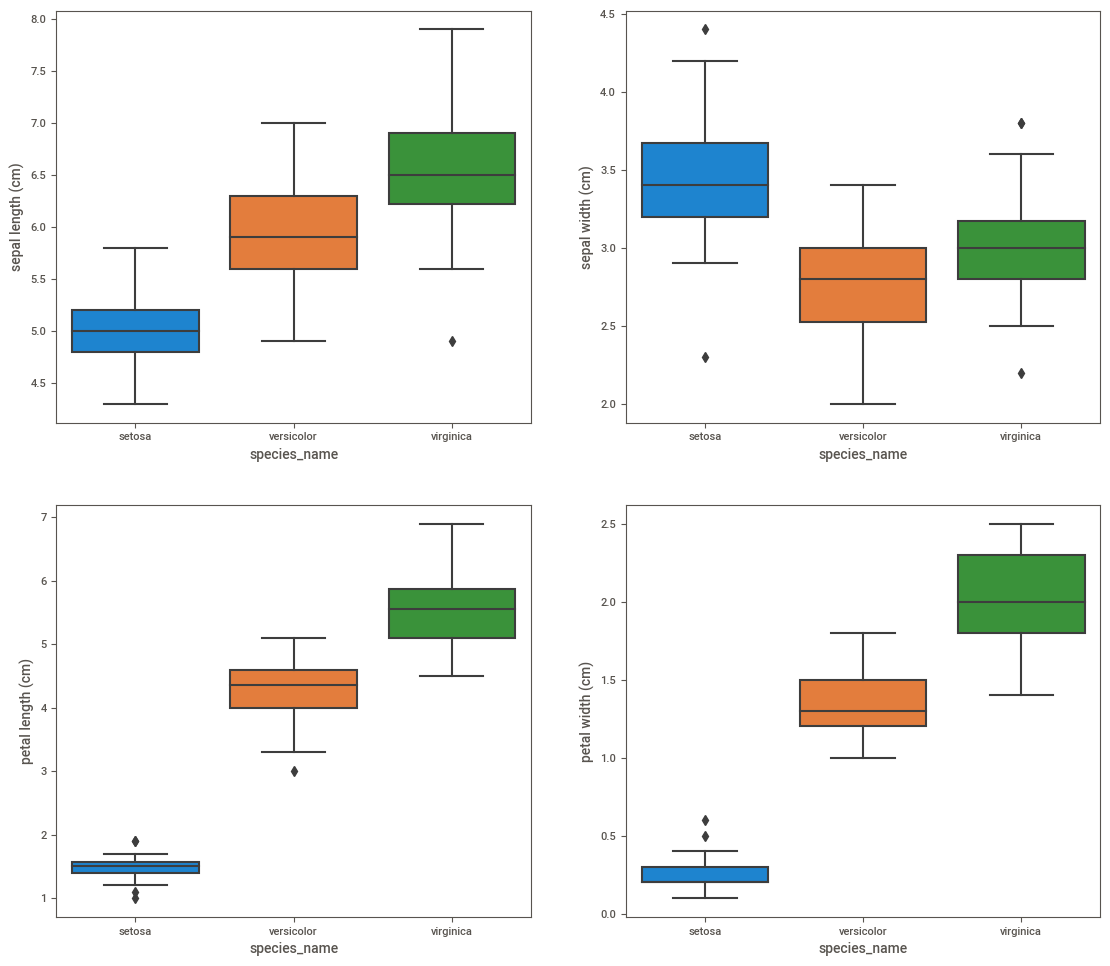

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
sns.boxplot( y='sepal length (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[0, 0])
sns.boxplot( y='sepal width (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[0, 1])
sns.boxplot( y='petal length (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[1, 0])
sns.boxplot( y='petal width (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[1, 1])
plt.show()

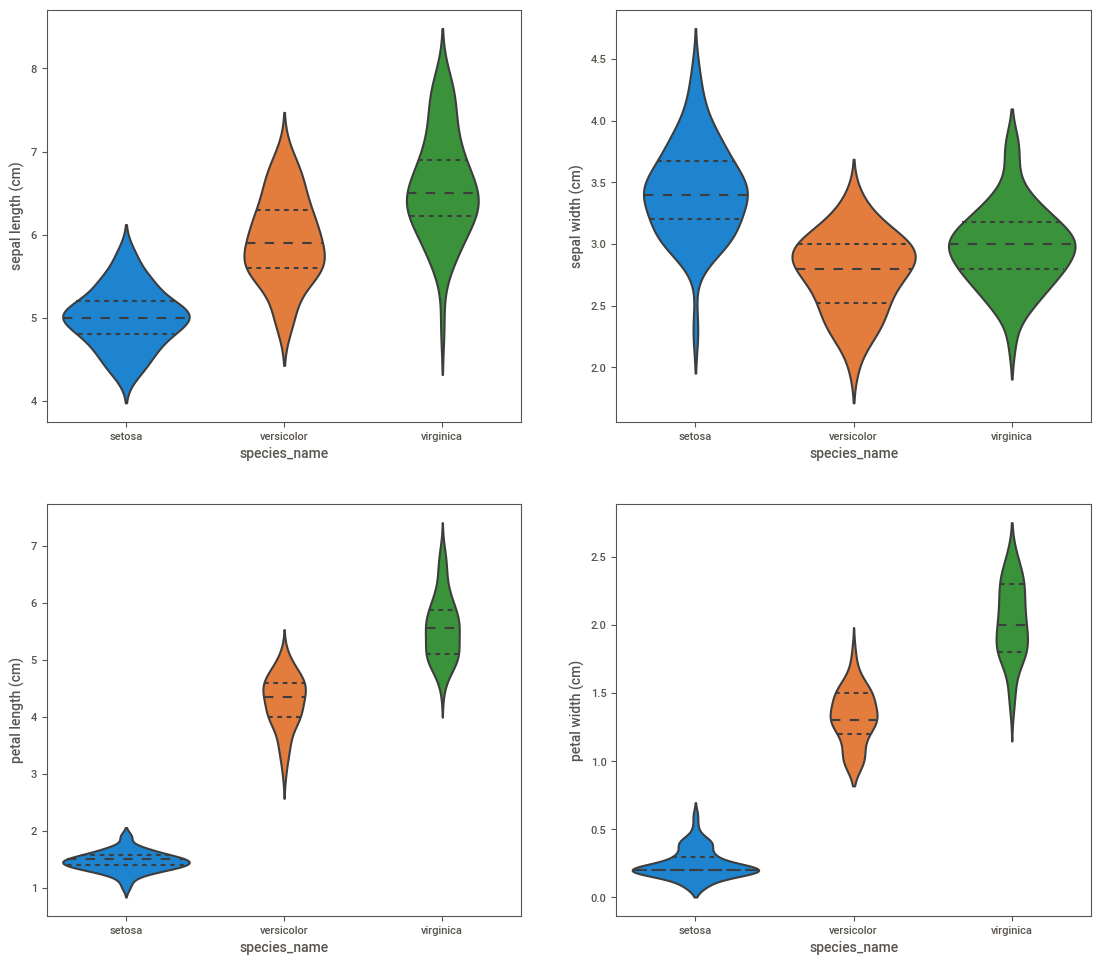

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
sns.violinplot( y='sepal length (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[0, 0], inner='quartile')
sns.violinplot( y='sepal width (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[0, 1], inner='quartile')
sns.violinplot( y='petal length (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[1, 0], inner='quartile')
sns.violinplot( y='petal width (cm)', x= 'species_name', data=irisDF, orient='v' , ax=axes[1, 1], inner='quartile')
plt.show()

The boxplots and violin plots are awfully useful in gaining a quick understanding of the variation of values between
species for different features. Firstly, it appears that the setosa iris has a distinct range of values unique to that species only for the factors of petal length, petal width, and sepal width. Even the sepal length factor displays that the bulk of the setosa iris values are fairly different than that of the versicolor and virginica iris. Additionally, the very small range of values for the setosa for petal length and petal width make the distinction very clear when analyzing these factors values. Despite the clear distincting of values for the setosa iris, such a profound distinction does not exist between the versicolor and virginica iris flowers. While the bulk of values for all 4 quantitative factors is slightly larger for the virginica iris, no clear distinction exists between the two and must be explored further. 

Now a quick note about the outliers for the displays above. Note that the recorded results will remain in the dataset and continue forward with them still present.

## 2-Dimensional Plots

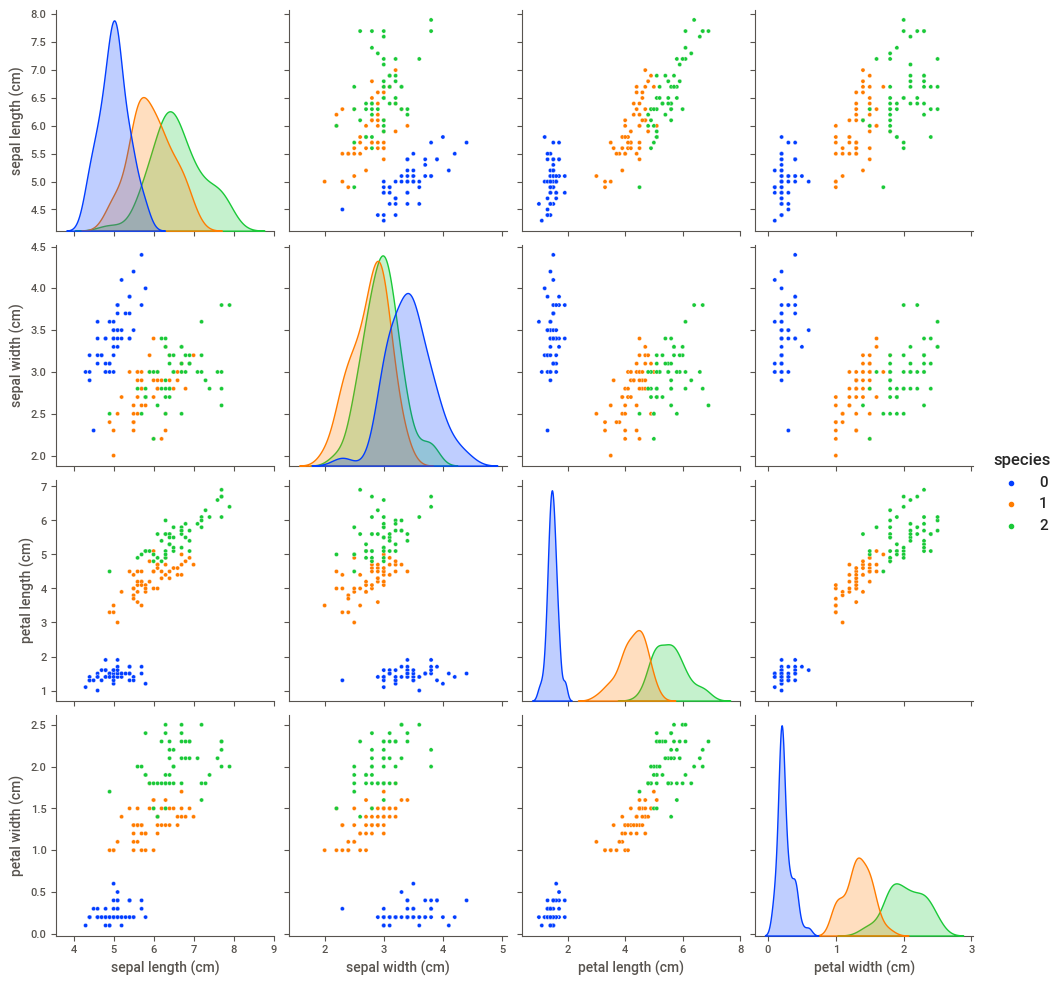

In [8]:
sns.pairplot(irisDF, hue = 'species', palette = 'bright')
plt.show()

In [9]:
def two_d_plot(var1='sepal length (cm)', var2='sepal width (cm)'):
    fig = px.scatter(irisDF, x=var1, y=var2, color = 'species', color_continuous_scale=px.colors.sequential.Bluered)
    fig.update_layout(title_text=f"{var1} vs {var2}".format(var1, var2), title_x=0.5)
    fig.show()
two_d_plot()

First, note that the pairplot shows all possible combinations of 2-dimensional scatterplots comparing the quantitative factors together, while using the specific species associated as a color hue. If one desires a more interactive and clear 2-dimensional plot with specific variables, then the two_d_plot() function is available for this purpose. Again, note that in these plots the clear distinction/cluster for the setosa iris vs the versicolor and virginica iris flowers. Every single plot shows that a cluster exists, due the significanly lower values of petal length and petal width in a setosa iris, and the slightly lower values of sepal length in the setosa flowers. While no distinction exists within the sepal width values, the other factors still provide enough information to create such a powerful distinction. Additionally, while slight separations exist between versicolor and virginica iris flowers (such as ther virginica iris having slightly larger values with petal length and width), there is still sigificant overlap with that of the versicolor and virginica iris flowers in many of the factor values.

In [10]:
#Treemap
fig = px.treemap(irisDF, path=[px.Constant("Iris Data"), 'petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 
                           'sepal width (cm)'],  color='species_name')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

For this previous visual I thought it would also be interesting to see if there are any unique and interesting ways to display hierarchical data. In this tree map, each box contains sub-boxes if the data falls into that specific box. The order of the boxes (from outer to inner) is: petal length, petal width, sepal length, and sepal width. For example, in the top left box of 1.4 (petal length), there is a sub-box of .2 (petal width), another sub-box of 5.0 (sepal length) and a final box of 3.6 (sepal width). Additionally, note that each final sub-box is given a hue based off of the species of that specific entry. If sub-boxes combine with various species, then the hue combines as a mixture of those two species colors. I enjoy this graph because it is interactive, clear, and contains concise, detailed information about the data.

## 3-Dimensional Plots

In [11]:
def three_d_plots(var1='sepal length (cm)', var2='sepal width (cm)', var3='petal length (cm)'):
    fig = px.scatter_3d(irisDF, x=var1, z=var2, y=var3, color = 'species')
    fig.update_layout(title_text=f"{var1} vs {var2} vs {var3}", title_x=0.5)
    fig.show()
three_d_plots()

Using the three_d_plot() function that is defined above, one can compare three factors in a scatterplot while also coloring for hue. These plots (including the default one comparing sepal length vs petal length, vs sepal width) all reiterate the same facts as stated earlier: The setosa iris has a distinct cluster compared to the rest of the iris flowers, and that the versicolor iris and the virginica iris are slightly different, but the line between the two is blured and not well defined. While the more extreme of the two pairs of iris flowers are easier to identify, the middle area is very blurred between the two.

# PCA

With our EDA completed in the previous section, we will continue onto our clustering analysis by first determining the proper number of clusters needed. The code to determine this is found below, using the Elbow method.

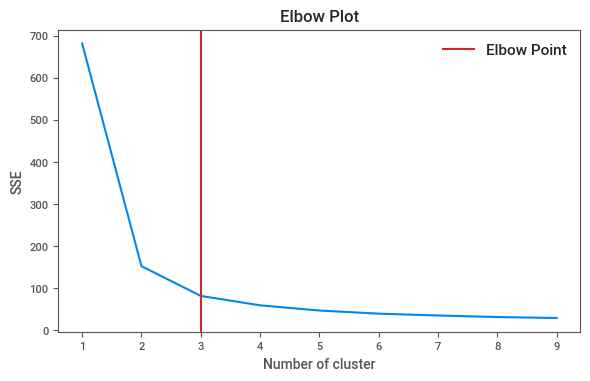

In [12]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(irisDF.drop(['species', 'species_name'], axis = 1))
    irisDF["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
irisDF = irisDF.drop('clusters', axis = 1)

plt.figure()
plt.title("Elbow Plot")
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.axvline(x=3, color = 'tab:red', label = 'Elbow Point')
patch1 = mpatches.Patch(color='tab:blue', label='setosa')
plt.legend()
plt.show()

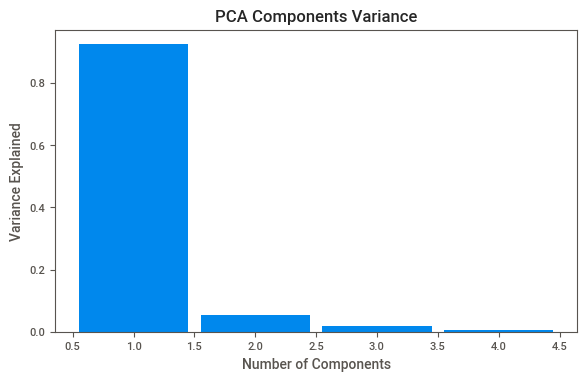

In [13]:
pca = PCA()
X_new = pca.fit_transform(irisDF.drop(['species', 'species_name'], axis=1))
explained_variance=pca.explained_variance_ratio_

plt.bar([i for i in range(1, len(explained_variance)+1)], explained_variance, width=.9)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.title("PCA Components Variance")
plt.show()

Recall that the purpose of PCA is to reduce the number of dimensions while still maintaining as much variance as possible. This is usually done by giving the PCA a certain variance threshold, that once met, will determine the number of compoenents to take. This project will use the threshold of .95 variance explained to determine the number of principal componets.

In [14]:
def pca_threshold(variance, thresh = .95):
    counter = 0
    amount = 0
    for i in range(len(variance)):
        counter += 1
        amount += variance[i]
        if amount > thresh:
            print(f"Keep {counter} principal components for a maintained variance of {amount}.")
            break
        
pca_threshold(explained_variance)

Keep 2 principal components for a maintained variance of 0.977685206318795.


Thus, to maintain at least .95 variance, the iris data set needs 2 principal components.

With this value now determined, the resulting reduced data set will be plotted with the species names included.

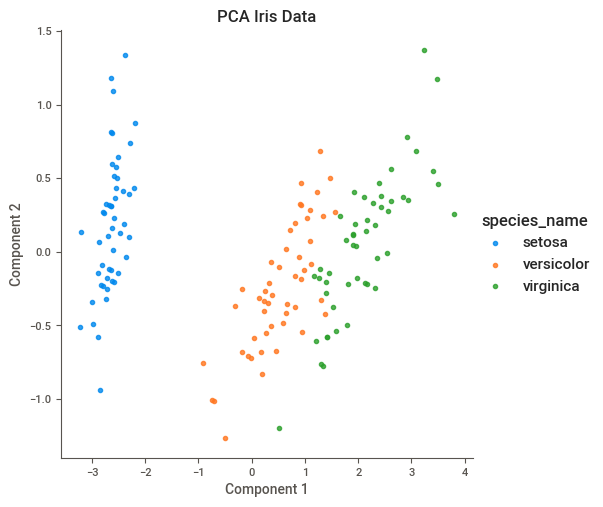

In [15]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(irisDF.drop(['species', 'species_name'], axis=1))
df_pca = pd.DataFrame(X_new, columns = ['Component 1', 'Component 2'])
df_pca['species'] = iris_loaded.target
df_pca['species_name'] = pd.Categorical.from_codes(iris_loaded.target, iris_loaded.target_names)

sns.lmplot(x='Component 1', y='Component 2', data=df_pca, hue='species_name', fit_reg=False)
plt.title("PCA Iris Data")
plt.show()

# Clustering

Note that before continuing, this function below will be used to calculate several key metrics to determine how well the model performs.

In [16]:
def calculate_metrics(actual, predicted, method):
    print('Metric Report of {}'.format(method))
    print('Accuracy: {:.2f}'.format(accuracy_score(actual, predicted)))
    print('Precision: {:.2f}'.format(precision_score(actual, predicted, average='micro')))
    print('Recall: {:.2f}'.format(recall_score(actual, predicted, average='micro')))
    print('F1-score: {:.2f}'.format(f1_score(actual, predicted, average='micro')))

## Kmeans - Original

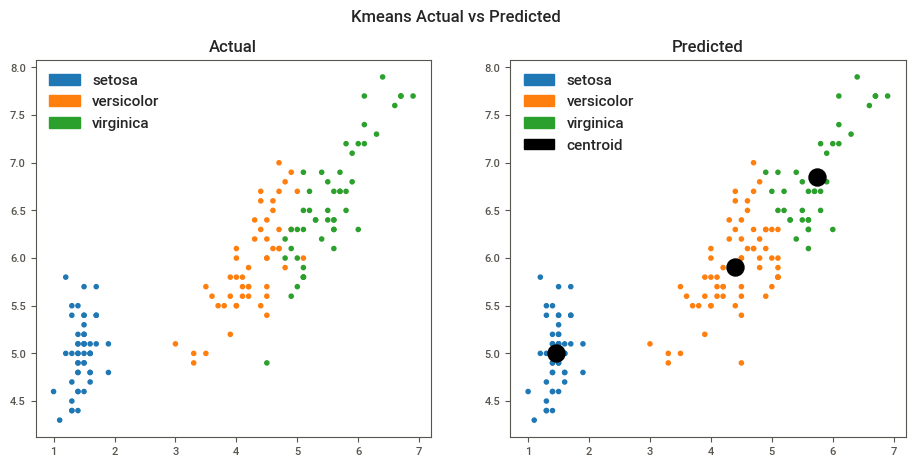

In [17]:
kmeans = KMeans(n_clusters = 3, random_state=2)
kmodel = kmeans.fit(irisDF.drop(['species', 'species_name'], axis=1))
predictions_kmeans = kmeans.predict(irisDF.drop(['species', 'species_name'], axis=1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Kmeans Actual vs Predicted')
ax1.set_title("Actual")
ax2.set_title("Predicted")
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}
ax1.scatter(irisDF['petal length (cm)'], irisDF['sepal length (cm)'], c=irisDF['species'].map(colors))
ax2.scatter(irisDF['petal length (cm)'], irisDF['sepal length (cm)'], c=pd.Series(predictions_kmeans).map(colors))
ax2.scatter(kmodel.cluster_centers_[:,2], kmodel.cluster_centers_[:,0], c='black', s = 150)
patch1 = mpatches.Patch(color='tab:blue', label='setosa')
patch2 = mpatches.Patch(color='tab:orange', label='versicolor')
patch3 = mpatches.Patch(color='tab:green', label='virginica')
patch4 = mpatches.Patch(color='black', label='centroid')
ax1.legend(handles=[patch1, patch2,patch3])
ax2.legend(handles=[patch1, patch2,patch3,patch4])
plt.show()

In [18]:
pd.crosstab(iris_loaded.target, predictions_kmeans)

col_0   0   1   2
row_0            
0      50   0   0
1       0  48   2
2       0  14  36

In [19]:
calculate_metrics(iris_loaded.target, predictions_kmeans, 'Standard Kmeans')

Metric Report of Standard Kmeans
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


## Kmeans - PCA

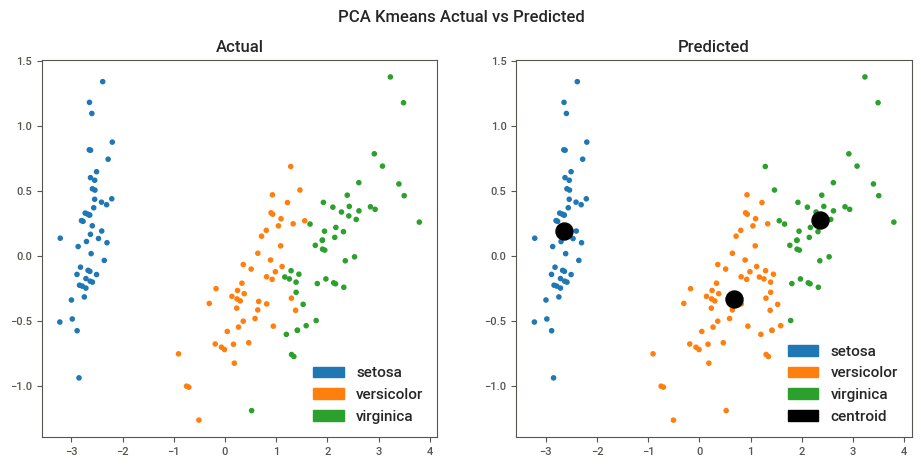

In [20]:
kmeans_pca = KMeans(n_clusters = 3, random_state=2)
kmodel_pca = kmeans_pca.fit(df_pca.drop(['species', 'species_name'], axis=1))
predictions_pca_kmeans = kmeans_pca.predict(df_pca.drop(['species', 'species_name'], axis=1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('PCA Kmeans Actual vs Predicted')
ax1.set_title("Actual")
ax2.set_title("Predicted")
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}
ax1.scatter(df_pca['Component 1'], df_pca['Component 2'], c=df_pca['species'].map(colors))
ax2.scatter(df_pca['Component 1'], df_pca['Component 2'], c=pd.Series(predictions_pca_kmeans).map(colors))
ax2.scatter(kmodel_pca.cluster_centers_[:,0], kmodel_pca.cluster_centers_[:,1], c='black', s = 150)
patch1 = mpatches.Patch(color='tab:blue', label='setosa')
patch2 = mpatches.Patch(color='tab:orange', label='versicolor')
patch3 = mpatches.Patch(color='tab:green', label='virginica')
patch4 = mpatches.Patch(color='black', label='centroid')
ax1.legend(handles=[patch1, patch2,patch3])
ax2.legend(handles=[patch1, patch2,patch3,patch4])
plt.show()

In [21]:
pd.crosstab(iris_loaded.target, predictions_pca_kmeans)

col_0   0   1   2
row_0            
0      50   0   0
1       0  47   3
2       0  14  36

In [22]:
calculate_metrics(iris_loaded.target, predictions_pca_kmeans, 'PCA Kmeans')

Metric Report of PCA Kmeans
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


## Agglomerative Clustering (Hierarchical) - Original

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters. This algorithm works by treating each entry point as its own single cluster. Then, pairs of clusters are successively merged untill all clusters have been merged into one big cluster containing all entry points. A visual representation of how this algorithm works is displayed below in a dendrogram.

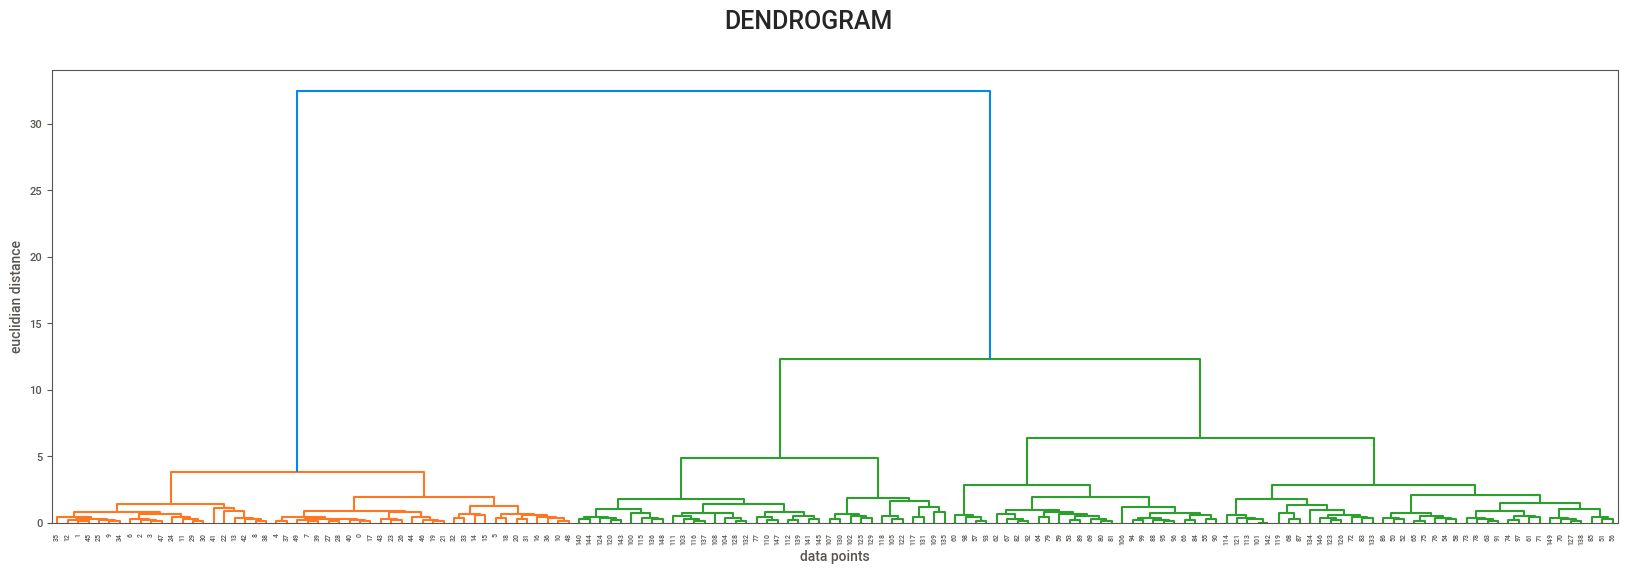

In [23]:
merg = linkage(irisDF.drop(['species', 'species_name'], axis = 1), method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

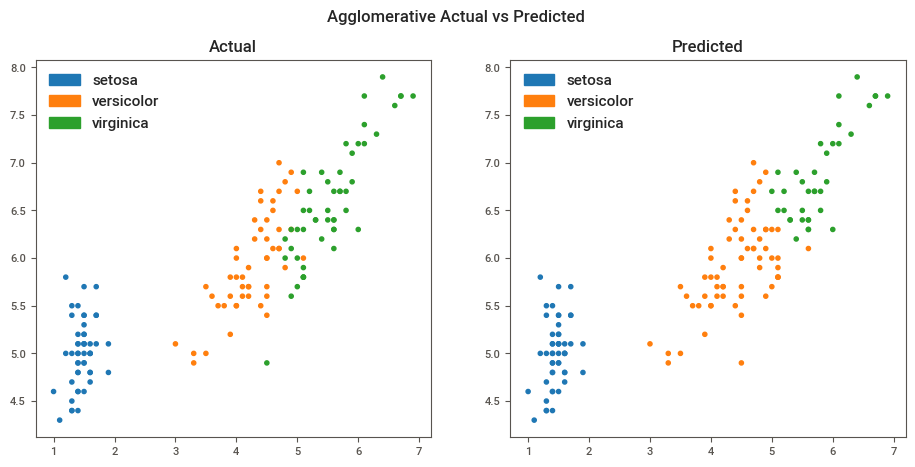

In [24]:
hc_cluster = AgglomerativeClustering(n_clusters=3)
predictions_hierarchical = hc_cluster.fit_predict(irisDF.drop(['species', 'species_name'], axis = 1))
predictions_hierarchical = np.where((predictions_hierarchical==0)|(predictions_hierarchical==1),
                                    predictions_hierarchical^1, predictions_hierarchical)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Agglomerative Actual vs Predicted')
ax1.set_title("Actual")
ax2.set_title("Predicted")
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}
ax1.scatter(irisDF['petal length (cm)'], irisDF['sepal length (cm)'], c=irisDF['species'].map(colors))
ax2.scatter(irisDF['petal length (cm)'], irisDF['sepal length (cm)'], c=pd.Series(predictions_hierarchical).map(colors))
patch1 = mpatches.Patch(color='tab:blue', label='setosa')
patch2 = mpatches.Patch(color='tab:orange', label='versicolor')
patch3 = mpatches.Patch(color='tab:green', label='virginica')
ax1.legend(handles=[patch1, patch2,patch3])
ax2.legend(handles=[patch1, patch2,patch3])
plt.show()

In [25]:
pd.crosstab(iris_loaded.target, predictions_hierarchical)

col_0   0   1   2
row_0            
0      50   0   0
1       0  49   1
2       0  15  35

In [26]:
calculate_metrics(iris_loaded.target, predictions_hierarchical, 'Agglomerative Clustering')

Metric Report of Agglomerative Clustering
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


## Agglomerative Clustering (Hierarchical) - PCA

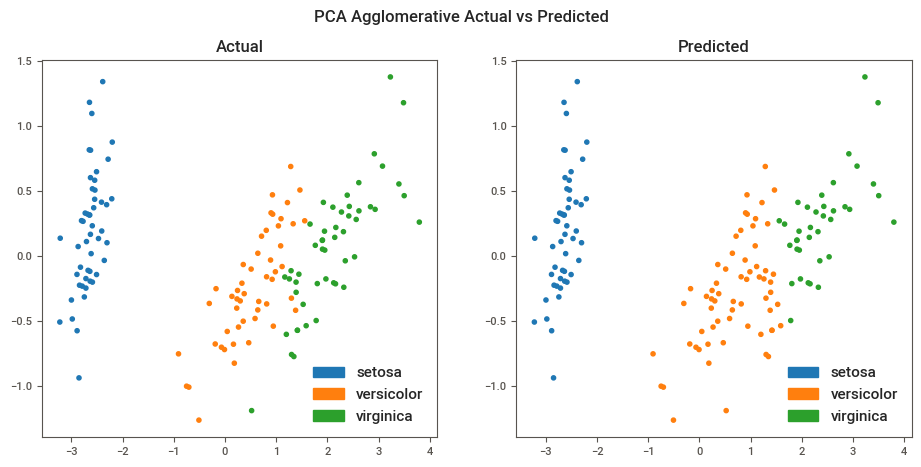

In [27]:
hc_cluster = AgglomerativeClustering(n_clusters=3)
predictions_pca_hierarchical = hc_cluster.fit_predict(df_pca.drop(['species', 'species_name'], axis = 1))
predictions_pca_hierarchical = np.where((predictions_pca_hierarchical==0)|(predictions_pca_hierarchical==1),
                                        predictions_pca_hierarchical^1, predictions_pca_hierarchical)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('PCA Agglomerative Actual vs Predicted')
ax1.set_title("Actual")
ax2.set_title("Predicted")
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}
ax1.scatter(df_pca['Component 1'], df_pca['Component 2'], c=df_pca['species'].map(colors))
ax2.scatter(df_pca['Component 1'], df_pca['Component 2'], c=pd.Series(predictions_pca_hierarchical).map(colors))
patch1 = mpatches.Patch(color='tab:blue', label='setosa')
patch2 = mpatches.Patch(color='tab:orange', label='versicolor')
patch3 = mpatches.Patch(color='tab:green', label='virginica')
ax1.legend(handles=[patch1, patch2,patch3])
ax2.legend(handles=[patch1, patch2,patch3])
plt.show()

In [28]:
pd.crosstab(iris_loaded.target, predictions_pca_hierarchical)

col_0   0   1   2
row_0            
0      50   0   0
1       0  49   1
2       0  14  36

In [29]:
calculate_metrics(iris_loaded.target, predictions_pca_hierarchical, 'PCA Agglomerative Clustering')

Metric Report of PCA Agglomerative Clustering
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90


## Gaussian Mixture Model - Original

The idea behind Gaussian Mixture Models (GMM) is that many datasets can be modeled by Gaussian Distributions. This assumption carries over to the idea that our dataset is a mixture of several different Gaussian Distributions. Therefore, the GMM algorithm uses expectation maximization to for fitting the data to these k number of Gaussian Distributions and predicting which entry belongs with which distribution, or cluster.

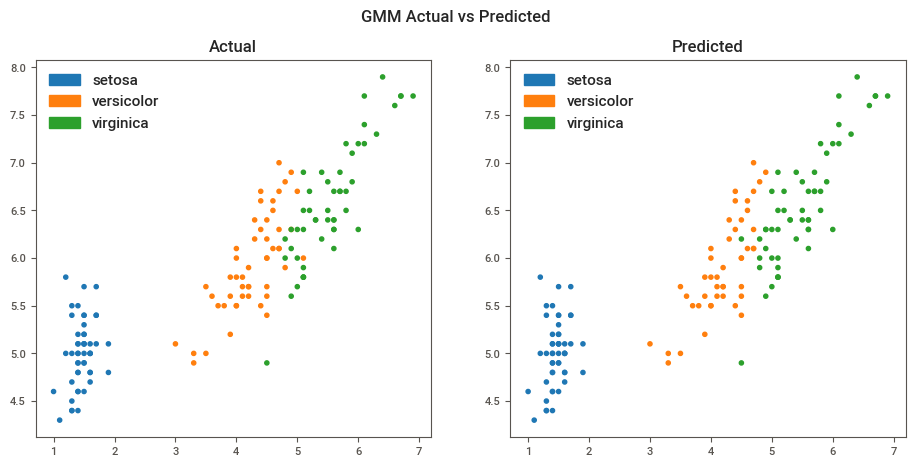

In [30]:
gmm = GaussianMixture(n_components=3, random_state=16)
predictions_gmm = gmm.fit_predict(irisDF.drop(['species', 'species_name'], axis=1))
predictions_gmm = np.where((predictions_gmm==0)|(predictions_gmm==1),
                                    predictions_gmm^1, predictions_gmm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('GMM Actual vs Predicted')
ax1.set_title("Actual")
ax2.set_title("Predicted")
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}
ax1.scatter(irisDF['petal length (cm)'], irisDF['sepal length (cm)'], c=irisDF['species'].map(colors))
ax2.scatter(irisDF['petal length (cm)'], irisDF['sepal length (cm)'], c=pd.Series(predictions_gmm).map(colors))
patch1 = mpatches.Patch(color='tab:blue', label='setosa')
patch2 = mpatches.Patch(color='tab:orange', label='versicolor')
patch3 = mpatches.Patch(color='tab:green', label='virginica')
ax1.legend(handles=[patch1, patch2,patch3])
ax2.legend(handles=[patch1, patch2,patch3])
plt.show()

In [31]:
pd.crosstab(iris_loaded.target, predictions_gmm)

col_0   0   1   2
row_0            
0      50   0   0
1       0  45   5
2       0   0  50

In [32]:
calculate_metrics(iris_loaded.target, predictions_gmm, 'Gaussian Mixture Model')

Metric Report of Gaussian Mixture Model
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97


## Gaussian Mixture Model - PCA

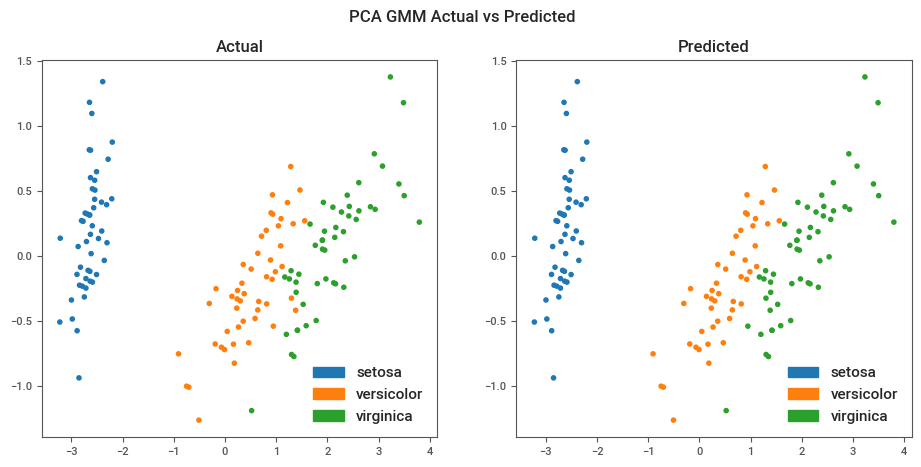

In [33]:
gmm = GaussianMixture(n_components=3, random_state=16)
predictions_pca_gmm = gmm.fit_predict(df_pca.drop(['species', 'species_name'], axis=1))
predictions_pca_gmm = np.where((predictions_pca_gmm==0)|(predictions_pca_gmm==1),
                                    predictions_pca_gmm^1, predictions_pca_gmm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('PCA GMM Actual vs Predicted')
ax1.set_title("Actual")
ax2.set_title("Predicted")
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}
ax1.scatter(df_pca['Component 1'], df_pca['Component 2'], c=df_pca['species'].map(colors))
ax2.scatter(df_pca['Component 1'], df_pca['Component 2'], c=pd.Series(predictions_pca_gmm).map(colors))
patch1 = mpatches.Patch(color='tab:blue', label='setosa')
patch2 = mpatches.Patch(color='tab:orange', label='versicolor')
patch3 = mpatches.Patch(color='tab:green', label='virginica')
ax1.legend(handles=[patch1, patch2,patch3])
ax2.legend(handles=[patch1, patch2,patch3])
plt.show()

In [34]:
pd.crosstab(iris_loaded.target, predictions_pca_gmm)

col_0   0   1   2
row_0            
0      50   0   0
1       0  47   3
2       0   0  50

In [35]:
calculate_metrics(iris_loaded.target, predictions_pca_gmm, 'PCA Gaussian Mixture Model')

Metric Report of PCA Gaussian Mixture Model
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


# Compare Results

First, note that the key metrics for the original dataset were:
- kmeans (89%)
- Agglomerative Clustering (89%)
- Gaussian Mixture Model (97%)

And note that the key metrics for the PCA dataset were:
- kmeans (89%)
- Agglomerative Clustering (90%)
- Gaussian Mixture Model (98%)

Thus, the best algorithm to predict the iris dataset is teh Gaussian Mixture Model algorithm. Additionally, note that there is virtually no difference between the original dataset and PCA dataset in prediction accuracy. The only result that changed was the Agglomerative Clustering algorithm and the Gaussian Mixture Model algorithm, which both improved by 1% when using the PCA dataset. In general however, for the iris dataset the PCA reduced datasets had the same results as the original dataset when using clustering algorithms.

# Conclusion

In conclusion, I was very impressed with the performance of the clustering algorithms. I was concerned that they might have issues in separating the virginica and versicolor iris flower (which, was by far the hardest thing these algorithms had to do), but they performed reasonably well. In the confusion matrix for every single algorithm, with both the original dataset and the PCA dataset, we see that they all 100% accurately predicted the setosa iris. From the EDA conducted previously, this was not unexpected, and it is nice to know that this cluster is distinct in comparision to the other iris flowers. As for the versicolor and virginica flowers, all algorithms performed decently well in predicting these flowers. The kmeans algorithm and Agglomerative Clustering algorithm both performed at around 89% (more on that later), which is admirable. However, they were completely outshown by the Gaussian Mixture Model algorithm at 97%. I think that one reason this occured is that both the kmeans algorithm and Agglomerative Clustering algorithm both were dependent upon distances between points and clusters. Thus, when there is overlap between some points, error will occur. However, the GAussian Mixture Model algorithm is a probabilistic model based off of Gaussian Distributions. This determining of model parameters was crucial in performing better in clustering.

As for the results comparing the original data to that of the PCA data, there weren't too many key differences. The only change between the original data and PCA data in model performance was that 1% increase in Agglomerative Clustering algorithm, along with the Gaussian Mixture Model. I think that this is reasonable to expect because the iris dataset only has 4 variable predictors in the first place, and doesn't need to reduce dimensionality by that much. I would expect PCA to perform much better on a dataset that has significantly more variables that the dataset that we just used.

Thus, this clustering project went well. The GNN algorithm perfomed best (which was unexpected), the PCA and origianal datasets performed basically the same when put into clustering algorithms (expected), and the visualization of the hierarchical plots was best done with that of a treemap, in comparision to a dendrogram.